## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection (optional parameter)?
API data loaded
DB relation POIs loaded
Table all households created
API and DB joined
containers per cluster determined


..\Code\loading_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3]).astype('int64')


distance matrix loaded


In [3]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2455230515281
Penalties are: 295.1202834747615


### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [11]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 249.6004611676881
Penalties are: 308.1859662117452
Average distance is : 248.58986072868302
Penalties are: 324.03315277834906
Average distance is : 248.24613560639435
Penalties are: 317.60948062685094
Average distance is : 259.65708733140605
Penalties are: 331.5412084687204
Average distance is : 253.78210525821714
Penalties are: 320.5298966886055
Average distance is : 251.0088087455015
Penalties are: 313.72705879328777
Average distance is : 257.87581836872755
Penalties are: 328.0021980957473
Average distance is : 257.52693890510665
Penalties are: 320.0460892563343
Average distance is : 251.728195645587
Penalties are: 322.6625204408982
Average di

Average distance is : 249.46911919720245
Penalties are: 310.77831947890814
310.77831947890814 308.1859662117452
21
Amount of clusters to change: 20
Average distance is : 250.41277788800892
Penalties are: 309.3911941332121
309.3911941332121 308.1859662117452
19
Amount of clusters to change: 14
Average distance is : 249.86113750682378
Penalties are: 306.94674800479675
306.94674800479675 308.1859662117452
19
Amount of clusters to change: 20
Average distance is : 248.08075405481563
Penalties are: 307.2517906572964
307.2517906572964 306.94674800479675
4
Amount of clusters to change: 9
Average distance is : 249.37246039522864
Penalties are: 308.6340980566466
308.6340980566466 306.94674800479675
14
Amount of clusters to change: 16
Average distance is : 252.26779624161802
Penalties are: 309.0916342290202
309.0916342290202 306.94674800479675
10
Amount of clusters to change: 10
Average distance is : 249.96387500194479
Penalties are: 307.58511625454844
307.58511625454844 306.94674800479675
12
Amo

Average distance is : 249.8524834686847
Penalties are: 292.59128270390875
292.59128270390875 292.26211032146097
13
Amount of clusters to change: 14
Average distance is : 251.4223993275882
Penalties are: 295.20574770680105
295.20574770680105 292.26211032146097
9
Amount of clusters to change: 11
Average distance is : 250.26365155755326
Penalties are: 292.9790482604743
292.9790482604743 292.26211032146097
8
Amount of clusters to change: 7
Average distance is : 250.0480569360151
Penalties are: 292.90369264936777
292.90369264936777 292.26211032146097
17
Amount of clusters to change: 17
Average distance is : 250.7829483345772
Penalties are: 293.38152911043454
293.38152911043454 292.26211032146097
20
Amount of clusters to change: 20
Average distance is : 249.92114104834468
Penalties are: 294.34633184597584
294.34633184597584 292.26211032146097
10
Amount of clusters to change: 15
Average distance is : 251.7261095980185
Penalties are: 296.86774405447665
296.86774405447665 292.26211032146097
12


Average distance is : 249.24063500366563
Penalties are: 288.0417938770451
288.0417938770451 285.892352937531
10
Amount of clusters to change: 12
Average distance is : 249.46490454106183
Penalties are: 283.7322443301524
283.7322443301524 285.892352937531
20
Amount of clusters to change: 11
Average distance is : 246.4803386983215
Penalties are: 285.3760168133185
285.3760168133185 283.7322443301524
11
Amount of clusters to change: 12
Average distance is : 249.7101771274863
Penalties are: 283.18617755194776
283.18617755194776 283.7322443301524
9
Amount of clusters to change: 11
Average distance is : 250.42222977080635
Penalties are: 292.03726878588833
292.03726878588833 283.18617755194776
13
Amount of clusters to change: 12
Average distance is : 249.1525670715021
Penalties are: 284.46824939072246
284.46824939072246 283.18617755194776
17
Amount of clusters to change: 10
Average distance is : 250.97285796830636
Penalties are: 283.3465916883546
283.3465916883546 283.18617755194776
13
Amount o

Average distance is : 249.20656443576604
Penalties are: 268.7164025982073
268.7164025982073 266.98087752488743
6
Amount of clusters to change: 9
Average distance is : 250.10248602168602
Penalties are: 270.94815039239984
270.94815039239984 266.98087752488743
11
Amount of clusters to change: 12
Average distance is : 249.3643254065846
Penalties are: 270.4151851171052
270.4151851171052 266.98087752488743
10
Amount of clusters to change: 10
Average distance is : 248.19633449624916
Penalties are: 268.13408790119377
268.13408790119377 266.98087752488743
9
Amount of clusters to change: 10
Average distance is : 248.63854788560286
Penalties are: 275.05307418452554
275.05307418452554 266.98087752488743
9
Amount of clusters to change: 7
Average distance is : 250.2450384031091
Penalties are: 268.9560049981411
268.9560049981411 266.98087752488743
17
Amount of clusters to change: 14
Average distance is : 250.57194084415715
Penalties are: 271.8008584410756
271.8008584410756 266.98087752488743
16
Amoun

Average distance is : 248.50959988538733
Penalties are: 271.3711002065262
271.3711002065262 263.93149888475835
18
Amount of clusters to change: 15
Average distance is : 250.49911025902398
Penalties are: 266.32661990912845
266.32661990912845 263.93149888475835
15
Amount of clusters to change: 12
Average distance is : 251.33658425129474
Penalties are: 265.36483378769105
265.36483378769105 263.93149888475835
22
Amount of clusters to change: 15
Average distance is : 248.78734276999396
Penalties are: 269.7332313824295
269.7332313824295 263.93149888475835
6
Amount of clusters to change: 11
Average distance is : 250.4082580690445
Penalties are: 265.6412714374226
265.6412714374226 263.93149888475835
10
Amount of clusters to change: 8
Average distance is : 250.12305341342335
Penalties are: 265.3756379182156
265.3756379182156 263.93149888475835
10
Amount of clusters to change: 10
Average distance is : 250.18250232587994
Penalties are: 264.7650925030979
264.7650925030979 263.93149888475835
8
Amou

Average distance is : 251.9379912890066
Penalties are: 258.0707591078067
258.0707591078067 258.64508069646394
15
Amount of clusters to change: 8
Average distance is : 253.16239190013852
Penalties are: 261.8930186080132
261.8930186080132 258.0707591078067
13
Amount of clusters to change: 15
Average distance is : 252.0250914537375
Penalties are: 268.1385670177612
268.1385670177612 258.0707591078067
14
Amount of clusters to change: 10
Average distance is : 252.26656321082314
Penalties are: 261.70800210656756
261.70800210656756 258.0707591078067
12
Amount of clusters to change: 9
Average distance is : 254.09838422074668
Penalties are: 259.2620217265593
259.2620217265593 258.0707591078067
13
Amount of clusters to change: 12
Average distance is : 250.9288700911078
Penalties are: 261.27418459314333
261.27418459314333 258.0707591078067
13
Amount of clusters to change: 11
Average distance is : 252.2127255044246
Penalties are: 266.24242982238746
266.24242982238746 258.0707591078067
18
Amount of 

Average distance is : 253.999362922834
Penalties are: 260.9853520033044
260.9853520033044 253.2065560305659
5
Amount of clusters to change: 10
Average distance is : 251.45069394593358
Penalties are: 259.0649463031805
259.0649463031805 253.2065560305659
10
Amount of clusters to change: 12
Average distance is : 252.58144157228966
Penalties are: 253.58756189591077
253.58756189591077 253.2065560305659
20
Amount of clusters to change: 20
Average distance is : 250.42445560089192
Penalties are: 258.65576955803385
258.65576955803385 253.2065560305659
17
Amount of clusters to change: 17
Average distance is : 253.17895121467086
Penalties are: 254.1154546055349
254.1154546055349 253.2065560305659
10
Amount of clusters to change: 14
Average distance is : 253.42206411139475
Penalties are: 253.66574958694756
253.66574958694756 253.2065560305659
17
Amount of clusters to change: 14
Average distance is : 251.35761767553157
Penalties are: 259.0283374638579
259.0283374638579 253.2065560305659
14
Amount o

Average distance is : 253.31657135759065
Penalties are: 254.45757118959108
254.45757118959108 248.98331140024783
22
Amount of clusters to change: 16
Average distance is : 251.78926953873182
Penalties are: 258.48339370095
258.48339370095 248.98331140024783
15
Amount of clusters to change: 11
Average distance is : 250.96533286363774
Penalties are: 252.32041933085506
252.32041933085506 248.98331140024783
9
Amount of clusters to change: 12
Average distance is : 250.7196776984064
Penalties are: 255.41006515902518
255.41006515902518 248.98331140024783
16
Amount of clusters to change: 13
Average distance is : 253.11577435119253
Penalties are: 253.57122271788518
253.57122271788518 248.98331140024783
19
Amount of clusters to change: 10
Average distance is : 252.27923182453287
Penalties are: 253.69495588599747
253.69495588599747 248.98331140024783
11
Amount of clusters to change: 11
Average distance is : 252.607343362107
Penalties are: 253.89645152829408
253.89645152829408 248.98331140024783
11


Average distance is : 249.99025517028545
Penalties are: 253.23936050098717
253.23936050098717 245.02887480380008
24
Amount of clusters to change: 15
Average distance is : 248.97965155593587
Penalties are: 244.8731001032631
244.8731001032631 245.02887480380008
13
Amount of clusters to change: 12
Average distance is : 249.84408856971257
Penalties are: 245.73799320528707
245.73799320528707 244.8731001032631
12
Amount of clusters to change: 14
Average distance is : 249.61434063653405
Penalties are: 255.33695817843866
255.33695817843866 244.8731001032631
13
Amount of clusters to change: 13
Average distance is : 248.6663774915515
Penalties are: 248.80474871953737
248.80474871953737 244.8731001032631
11
Amount of clusters to change: 10
Average distance is : 248.46888710626448
Penalties are: 248.25351191656338
248.25351191656338 244.8731001032631
13
Amount of clusters to change: 10
Average distance is : 249.875934331406
Penalties are: 248.74962346137957
248.74962346137957 244.8731001032631
5
A

Average distance is : 248.20967658402276
Penalties are: 243.5278173275506
243.5278173275506 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 254.79943389478169
Penalties are: 245.03177399636542
245.03177399636542 243.02761420900453
18
Amount of clusters to change: 12
Average distance is : 254.31872965900172
Penalties are: 246.4047883725733
246.4047883725733 243.02761420900453
17
Amount of clusters to change: 13
Average distance is : 249.83931394286475
Penalties are: 249.49907752994628
249.49907752994628 243.02761420900453
12
Amount of clusters to change: 13
Average distance is : 249.7406186140392
Penalties are: 243.64822476249483
243.64822476249483 243.02761420900453
14
Amount of clusters to change: 14
Average distance is : 248.84411240199094
Penalties are: 245.57800881866999
245.57800881866999 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 248.74998702369143
Penalties are: 252.2226475629905
252.2226475629905 243.02761420900453


Average distance is : 248.67733540633932
Penalties are: 241.97386212308965
241.97386212308965 242.19352947129286
17
Amount of clusters to change: 16
Average distance is : 253.50603253310604
Penalties are: 245.82199458901277
245.82199458901277 241.97386212308965
11
Amount of clusters to change: 8
Average distance is : 248.9588850003072
Penalties are: 243.70289708798018
243.70289708798018 241.97386212308965
13
Amount of clusters to change: 13
Average distance is : 248.15570027571462
Penalties are: 246.37543684427925
246.37543684427925 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 246.8868261690137
Penalties are: 246.8916854812061
246.8916854812061 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 251.65982485719428
Penalties are: 245.37223946803235
245.37223946803235 241.97386212308965
9
Amount of clusters to change: 11
Average distance is : 247.43764208928377
Penalties are: 248.8950092936803
248.8950092936803 241.97386212308965
1

Average distance is : 248.80447808086535
Penalties are: 240.65921650144568
240.65921650144568 239.30616732755058
16
Amount of clusters to change: 15
Average distance is : 247.7692641723551
Penalties are: 246.1129566088393
246.1129566088393 239.30616732755058
16
Amount of clusters to change: 14
Average distance is : 257.292948355713
Penalties are: 243.36968042131352
243.36968042131352 239.30616732755058
8
Amount of clusters to change: 7
Average distance is : 248.2668223842092
Penalties are: 242.14931592317228
242.14931592317228 239.30616732755058
6
Amount of clusters to change: 6
Average distance is : 249.14803585339382
Penalties are: 239.30616732755058
239.30616732755058 239.30616732755058
14
Amount of clusters to change: 12
Average distance is : 249.298747133334
Penalties are: 239.9277560305659
239.9277560305659 239.30616732755058
19
Amount of clusters to change: 15
Average distance is : 248.07684871746585
Penalties are: 246.90253733994217
246.90253733994217 239.30616732755058
15
Amou

Average distance is : 251.09996912880547
Penalties are: 244.31396425030977
244.31396425030977 236.5562936802974
16
Amount of clusters to change: 15
Average distance is : 249.12536257324825
Penalties are: 240.69268302354396
240.69268302354396 236.5562936802974
14
Amount of clusters to change: 9
Average distance is : 249.1939139787592
Penalties are: 238.35588804213137
238.35588804213137 236.5562936802974
5
Amount of clusters to change: 6
Average distance is : 250.83694131621297
Penalties are: 237.03928306484923
237.03928306484923 236.5562936802974
16
Amount of clusters to change: 12
Average distance is : 249.17060741582776
Penalties are: 238.9748907063197
238.9748907063197 236.5562936802974
17
Amount of clusters to change: 14
Average distance is : 249.37663891530053
Penalties are: 238.96926299049977
238.96926299049977 236.5562936802974
19
Amount of clusters to change: 13
Average distance is : 250.56825013909298
Penalties are: 239.7766430813713
239.7766430813713 236.5562936802974
20
Amoun

Average distance is : 250.95956442850354
Penalties are: 236.98699244114002
236.98699244114002 236.4954705700124
15
Amount of clusters to change: 11
Average distance is : 250.17285550274448
Penalties are: 240.77317333746387
240.77317333746387 236.4954705700124
19
Amount of clusters to change: 11
Average distance is : 249.72224339517246
Penalties are: 242.15149624122262
242.15149624122262 236.4954705700124
14
Amount of clusters to change: 18
Average distance is : 249.95464659034243
Penalties are: 236.59672513629602
236.59672513629602 236.4954705700124
20
Amount of clusters to change: 16
Average distance is : 247.99927002289516
Penalties are: 242.29799446509705
242.29799446509705 236.4954705700124
15
Amount of clusters to change: 13
Average distance is : 252.97320915577234
Penalties are: 243.52030258157782
243.52030258157782 236.4954705700124
21
Amount of clusters to change: 17
Average distance is : 249.6807653868905
Penalties are: 238.8810329409335
238.8810329409335 236.4954705700124
11


Average distance is : 250.94393524243822
Penalties are: 239.08316071871124
239.08316071871124 233.58625371747212
22
Amount of clusters to change: 19
Average distance is : 250.54812462591184
Penalties are: 249.54746106980585
249.54746106980585 233.58625371747212
16
Amount of clusters to change: 12
Average distance is : 252.07305131547355
Penalties are: 236.98073331268068
236.98073331268068 233.58625371747212
5
Amount of clusters to change: 8
Average distance is : 251.24829468907373
Penalties are: 234.53084111937218
234.53084111937218 233.58625371747212
17
Amount of clusters to change: 15
Average distance is : 252.31186667420891
Penalties are: 235.16932548533666
235.16932548533666 233.58625371747212
9
Amount of clusters to change: 13
Average distance is : 251.24936452445792
Penalties are: 242.00455351094584
242.00455351094584 233.58625371747212
23
Amount of clusters to change: 20
Average distance is : 248.3067700857326
Penalties are: 244.79317251135896
244.79317251135896 233.586253717472

Average distance is : 256.5446875353265
Penalties are: 239.96944237680202
239.96944237680202 231.7319876290789
14
Amount of clusters to change: 11
Average distance is : 253.69197771472977
Penalties are: 237.10849265794667
237.10849265794667 231.7319876290789
20
Amount of clusters to change: 15
Average distance is : 253.7554667002975
Penalties are: 237.44281400247831
237.44281400247831 231.7319876290789
14
Amount of clusters to change: 13
Average distance is : 250.8457462865047
Penalties are: 238.4882757331681
238.4882757331681 231.7319876290789
4
Amount of clusters to change: 12
Average distance is : 253.74167707184287
Penalties are: 236.08355782734407
236.08355782734407 231.7319876290789
17
Amount of clusters to change: 15
Average distance is : 254.96026801233063
Penalties are: 242.68819607600165
242.68819607600165 231.7319876290789
11
Amount of clusters to change: 17
Average distance is : 254.33496807448194
Penalties are: 232.5069305245766
232.5069305245766 231.7319876290789
12
Amoun

Average distance is : 254.11614496752486
Penalties are: 236.8151158612144
236.8151158612144 230.16960877736472
7
Amount of clusters to change: 10
Average distance is : 254.1540487334328
Penalties are: 236.81219097480383
236.81219097480383 230.16960877736472
2
Amount of clusters to change: 4
Average distance is : 254.2624608472983
Penalties are: 230.99160772408095
230.99160772408095 230.16960877736472
20
Amount of clusters to change: 10
Average distance is : 255.65100025096277
Penalties are: 232.82253849648907
232.82253849648907 230.16960877736472
16
Amount of clusters to change: 9
Average distance is : 254.6695147913849
Penalties are: 231.37759266831887
231.37759266831887 230.16960877736472
10
Amount of clusters to change: 15
Average distance is : 253.6691814594099
Penalties are: 235.09068736059479
235.09068736059479 230.16960877736472
18
Amount of clusters to change: 16
Average distance is : 254.23785167547334
Penalties are: 230.32913698884755
230.32913698884755 230.16960877736472
11


Average distance is : 252.99894271904012
Penalties are: 241.1399876604146
241.1399876604146 230.16960877736472
12
Amount of clusters to change: 12
Average distance is : 254.90543573750054
Penalties are: 230.88123048327137
230.88123048327137 230.16960877736472
16
Amount of clusters to change: 16
Average distance is : 254.22647139050952
Penalties are: 236.08501540685668
236.08501540685668 230.16960877736472
10
Amount of clusters to change: 11
Average distance is : 252.25134661060986
Penalties are: 233.46566658405618
233.46566658405618 230.16960877736472
15
Amount of clusters to change: 12
Average distance is : 255.08920888374652
Penalties are: 235.96556615035104
235.96556615035104 230.16960877736472
4
Amount of clusters to change: 6
Average distance is : 254.35175321762625
Penalties are: 232.3571054935977
232.3571054935977 230.16960877736472
12
Amount of clusters to change: 10
Average distance is : 253.80363658012732
Penalties are: 235.82617600165221
235.82617600165221 230.16960877736472

Average distance is : 253.84927837916757
Penalties are: 234.16107490706324
234.16107490706324 230.16960877736472
6
Amount of clusters to change: 7
Average distance is : 254.9491310754418
Penalties are: 232.80768163981827
232.80768163981827 230.16960877736472
9
Amount of clusters to change: 11
Average distance is : 255.64327768305645
Penalties are: 235.34017649731518
235.34017649731518 230.16960877736472
16
Amount of clusters to change: 8
Average distance is : 253.22726672790128
Penalties are: 232.41314911193723
232.41314911193723 230.16960877736472
10
Amount of clusters to change: 16
Average distance is : 255.65103952808866
Penalties are: 234.7866704047914
234.7866704047914 230.16960877736472
17
Amount of clusters to change: 14
Average distance is : 253.91572140916142
Penalties are: 234.8092723048327
234.8092723048327 230.16960877736472
14
Amount of clusters to change: 11
Average distance is : 253.95198882807702
Penalties are: 235.9991588393226
235.9991588393226 230.16960877736472
10
A

Average distance is : 256.08027607638275
Penalties are: 229.14309233787694
229.14309233787694 229.40115741429165
17
Amount of clusters to change: 9
Average distance is : 255.66641195358142
Penalties are: 236.90269297810823
236.90269297810823 229.14309233787694
14
Amount of clusters to change: 12
Average distance is : 256.48080992436667
Penalties are: 245.87857668318873
245.87857668318873 229.14309233787694
15
Amount of clusters to change: 12
Average distance is : 255.96510461578202
Penalties are: 239.48799458945976
239.48799458945976 229.14309233787694
9
Amount of clusters to change: 12
Average distance is : 256.81003213800074
Penalties are: 236.80627675436784
236.80627675436784 229.14309233787694
7
Amount of clusters to change: 6
Average distance is : 256.4075844749933
Penalties are: 231.86005861214375
231.86005861214375 229.14309233787694
7
Amount of clusters to change: 8
Average distance is : 257.23316745765
Penalties are: 233.09355390342222
233.09355390342222 229.14309233787694
12


Average distance is : 252.9982562584873
Penalties are: 233.76053684427922
233.76053684427922 227.2100494630318
13
Amount of clusters to change: 12
Average distance is : 255.71714906108934
Penalties are: 229.6595076621231
229.6595076621231 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 253.0392310374021
Penalties are: 232.76794072697234
232.76794072697234 227.2100494630318
5
Amount of clusters to change: 7
Average distance is : 254.26400827420827
Penalties are: 228.29828448988025
228.29828448988025 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 254.52011689017885
Penalties are: 233.0862147695358
233.0862147695358 227.2100494630318
21
Amount of clusters to change: 14
Average distance is : 254.47174845313668
Penalties are: 241.05208597686905
241.05208597686905 227.2100494630318
10
Amount of clusters to change: 14
Average distance is : 254.50477185173136
Penalties are: 234.92813343659645
234.92813343659645 227.2100494630318
6
Amount o

Average distance is : 254.89777951673992
Penalties are: 229.25270338703012
229.25270338703012 225.1926903139199
14
Amount of clusters to change: 12
Average distance is : 256.6181669282413
Penalties are: 235.06410245969067
235.06410245969067 225.1926903139199
3
Amount of clusters to change: 5
Average distance is : 256.1208486809391
Penalties are: 226.88133562577445
226.88133562577445 225.1926903139199
8
Amount of clusters to change: 11
Average distance is : 253.81457616607113
Penalties are: 230.67864706732757
230.67864706732757 225.1926903139199
17
Amount of clusters to change: 22
Average distance is : 252.67273218189794
Penalties are: 245.88615243700949
245.88615243700949 225.1926903139199
10
Amount of clusters to change: 11
Average distance is : 257.24862839232685
Penalties are: 228.49951581990916
228.49951581990916 225.1926903139199
10
Amount of clusters to change: 10
Average distance is : 254.9489431769123
Penalties are: 232.5279450433705
232.5279450433705 225.1926903139199
5
Amount

Average distance is : 255.89128379892304
Penalties are: 231.66993579099545
231.66993579099545 223.98575514250305
13
Amount of clusters to change: 13
Average distance is : 253.7062115101985
Penalties are: 231.52455464684016
231.52455464684016 223.98575514250305
12
Amount of clusters to change: 15
Average distance is : 257.3976354745168
Penalties are: 228.35233049727407
228.35233049727407 223.98575514250305
17
Amount of clusters to change: 16
Average distance is : 256.6756294432817
Penalties are: 227.36023137133418
227.36023137133418 223.98575514250305
8
Amount of clusters to change: 9
Average distance is : 256.6083851712563
Penalties are: 225.2077349442379
225.2077349442379 223.98575514250305
11
Amount of clusters to change: 14
Average distance is : 255.42870497151029
Penalties are: 228.93406272201568
228.93406272201568 223.98575514250305
7
Amount of clusters to change: 11
Average distance is : 256.0105011473935
Penalties are: 225.6706404378356
225.6706404378356 223.98575514250305
6
Amo

Average distance is : 256.3370456800133
Penalties are: 232.58765809582815
232.58765809582815 219.42773199091283
15
Amount of clusters to change: 15
Average distance is : 255.0598991648788
Penalties are: 226.94970074349442
226.94970074349442 219.42773199091283
14
Amount of clusters to change: 10
Average distance is : 253.75693536008725
Penalties are: 219.44047178851713
219.44047178851713 219.42773199091283
18
Amount of clusters to change: 16
Average distance is : 251.76713187305938
Penalties are: 226.37918471705905
226.37918471705905 219.42773199091283
13
Amount of clusters to change: 18
Average distance is : 254.15404446745117
Penalties are: 225.02421621010203
225.02421621010203 219.42773199091283
8
Amount of clusters to change: 11
Average distance is : 254.54384285579314
Penalties are: 221.37321561338288
221.37321561338288 219.42773199091283
10
Amount of clusters to change: 14
Average distance is : 253.3859805054046
Penalties are: 223.9903896117307
223.9903896117307 219.42773199091283

Average distance is : 254.4873324174233
Penalties are: 223.16270454357704
223.16270454357704 218.43208820735236
10
Amount of clusters to change: 16
Average distance is : 254.74340088959366
Penalties are: 224.366474370095
224.366474370095 218.43208820735236
9
Amount of clusters to change: 10
Average distance is : 254.22728380276155
Penalties are: 223.35597383312682
223.35597383312682 218.43208820735236
5
Amount of clusters to change: 8
Average distance is : 253.96824191115422
Penalties are: 219.32608870301527
219.32608870301527 218.43208820735236
21
Amount of clusters to change: 14
Average distance is : 256.18448159386156
Penalties are: 222.24554582817018
222.24554582817018 218.43208820735236
13
Amount of clusters to change: 12
Average distance is : 253.2331207056436
Penalties are: 227.35876340901612
227.35876340901612 218.43208820735236
14
Amount of clusters to change: 9
Average distance is : 254.58399513086073
Penalties are: 219.22116499380417
219.22116499380417 218.43208820735236
12


Average distance is : 252.66678300624432
Penalties are: 222.2356846757538
222.2356846757538 218.36783847583644
14
Amount of clusters to change: 9
Average distance is : 253.33299523641648
Penalties are: 222.43461707971915
222.43461707971915 218.36783847583644
12
Amount of clusters to change: 11
Average distance is : 252.91300296327537
Penalties are: 219.54988040066087
219.54988040066087 218.36783847583644
11
Amount of clusters to change: 11
Average distance is : 251.6437484828569
Penalties are: 222.68528143329203
222.68528143329203 218.36783847583644
17
Amount of clusters to change: 18
Average distance is : 252.93960344759853
Penalties are: 229.05686866997107
229.05686866997107 218.36783847583644
8
Amount of clusters to change: 14
Average distance is : 252.93650729117036
Penalties are: 220.26451497315156
220.26451497315156 218.36783847583644
15
Amount of clusters to change: 10
Average distance is : 252.94761870730918
Penalties are: 225.91367238744317
225.91367238744317 218.3678384758364

Average distance is : 253.73713366256158
Penalties are: 221.01295933834464
221.01295933834464 218.32087401900043
9
Amount of clusters to change: 11
Average distance is : 253.88554593236165
Penalties are: 219.222732858323
219.222732858323 218.32087401900043
13
Amount of clusters to change: 12
Average distance is : 253.34195875267832
Penalties are: 229.4030989880215
229.4030989880215 218.32087401900043
14
Amount of clusters to change: 17
Average distance is : 253.681995530977
Penalties are: 225.37751968194962
225.37751968194962 218.32087401900043
18
Amount of clusters to change: 14
Average distance is : 252.93846481496618
Penalties are: 218.23917883106157
218.23917883106157 218.32087401900043
17
Amount of clusters to change: 10
Average distance is : 249.99689919982168
Penalties are: 222.45497631144156
222.45497631144156 218.23917883106157
11
Amount of clusters to change: 12
Average distance is : 254.35310807377192
Penalties are: 224.49075148698884
224.49075148698884 218.23917883106157
14

Average distance is : 251.5873898014442
Penalties are: 229.9781824246179
229.9781824246179 218.23917883106157
10
Amount of clusters to change: 12
Average distance is : 253.28549418309368
Penalties are: 219.91966648079304
219.91966648079304 218.23917883106157
11
Amount of clusters to change: 7
Average distance is : 252.76616697639065
Penalties are: 218.19610693928126
218.19610693928126 218.23917883106157
11
Amount of clusters to change: 14
Average distance is : 254.6320724838539
Penalties are: 229.08493230070218
229.08493230070218 218.19610693928126
16
Amount of clusters to change: 12
Average distance is : 252.12018290053723
Penalties are: 219.92503035935565
219.92503035935565 218.19610693928126
16
Amount of clusters to change: 16
Average distance is : 252.922835795516
Penalties are: 227.79292152003302
227.79292152003302 218.19610693928126
8
Amount of clusters to change: 9
Average distance is : 252.64008676823732
Penalties are: 229.40532674514662
229.40532674514662 218.19610693928126
8


Average distance is : 253.37238205298183
Penalties are: 223.842897976043
223.842897976043 217.81279653035935
6
Amount of clusters to change: 8
Average distance is : 252.45528004558395
Penalties are: 222.12601290788933
222.12601290788933 217.81279653035935
12
Amount of clusters to change: 12
Average distance is : 253.5805166298496
Penalties are: 221.5414785006196
221.5414785006196 217.81279653035935
14
Amount of clusters to change: 10
Average distance is : 253.41337241323717
Penalties are: 227.5940089223016
227.5940089223016 217.81279653035935
7
Amount of clusters to change: 8
Average distance is : 253.27260794938152
Penalties are: 217.48288461379596
217.48288461379596 217.81279653035935
12
Amount of clusters to change: 9
Average distance is : 252.82824862884692
Penalties are: 219.3473523337464
219.3473523337464 217.48288461379596
25
Amount of clusters to change: 19
Average distance is : 254.22693815910205
Penalties are: 220.72932676579924
220.72932676579924 217.48288461379596
6
Amount 

Average distance is : 253.02478219270697
Penalties are: 213.58110156959933
213.58110156959933 213.39727567121022
6
Amount of clusters to change: 10
Average distance is : 253.14033643058312
Penalties are: 214.2554363538741
214.2554363538741 213.39727567121022
7
Amount of clusters to change: 8
Average distance is : 253.5509188815413
Penalties are: 220.486146716233
220.486146716233 213.39727567121022
12
Amount of clusters to change: 9
Average distance is : 253.33061869188035
Penalties are: 219.20927492771582
219.20927492771582 213.39727567121022
9
Amount of clusters to change: 12
Average distance is : 254.30895344888344
Penalties are: 220.57857705493598
220.57857705493598 213.39727567121022
6
Amount of clusters to change: 9
Average distance is : 254.2592078917371
Penalties are: 220.85195456975976
220.85195456975976 213.39727567121022
9
Amount of clusters to change: 13
Average distance is : 254.98644713850484
Penalties are: 234.1906590251962
234.1906590251962 213.39727567121022
8
Amount of

Average distance is : 253.2272666755516
Penalties are: 220.6036581371334
220.6036581371334 213.07886073936388
17
Amount of clusters to change: 15
Average distance is : 255.3741167434238
Penalties are: 215.82808519206935
215.82808519206935 213.07886073936388
16
Amount of clusters to change: 14
Average distance is : 253.7273068835051
Penalties are: 219.42139330855017
219.42139330855017 213.07886073936388
15
Amount of clusters to change: 14
Average distance is : 252.45898329765706
Penalties are: 221.67791367203634
221.67791367203634 213.07886073936388
12
Amount of clusters to change: 12
Average distance is : 252.27383804656094
Penalties are: 224.03745336637752
224.03745336637752 213.07886073936388
11
Amount of clusters to change: 17
Average distance is : 253.69615041700007
Penalties are: 214.5591706113176
214.5591706113176 213.07886073936388
3
Amount of clusters to change: 3
Average distance is : 253.3900092951831
Penalties are: 213.07886073936388
213.07886073936388 213.07886073936388
3
A

Average distance is : 252.40185637891227
Penalties are: 221.19102234613794
221.19102234613794 212.57885448161917
15
Amount of clusters to change: 14
Average distance is : 253.19075000317267
Penalties are: 216.9326660057827
216.9326660057827 212.57885448161917
8
Amount of clusters to change: 12
Average distance is : 255.64592390821775
Penalties are: 216.4878194134655
216.4878194134655 212.57885448161917
11
Amount of clusters to change: 13
Average distance is : 252.08297975085648
Penalties are: 222.70417971912428
222.70417971912428 212.57885448161917
12
Amount of clusters to change: 10
Average distance is : 254.4496067228097
Penalties are: 221.32535588599754
221.32535588599754 212.57885448161917
14
Amount of clusters to change: 17
Average distance is : 257.13733536683446
Penalties are: 216.41084396943413
216.41084396943413 212.57885448161917
11
Amount of clusters to change: 14
Average distance is : 252.11086993099357
Penalties are: 218.32672899628253
218.32672899628253 212.57885448161917

Average distance is : 252.10157730734488
Penalties are: 211.11862256319182
211.11862256319182 209.1710615190815
8
Amount of clusters to change: 11
Average distance is : 252.63580426454635
Penalties are: 216.902352387246
216.902352387246 209.1710615190815
9
Amount of clusters to change: 7
Average distance is : 251.80462436950825
Penalties are: 209.34034586155627
209.34034586155627 209.1710615190815
14
Amount of clusters to change: 15
Average distance is : 252.1610733624669
Penalties are: 216.55775448124896
216.55775448124896 209.1710615190815
12
Amount of clusters to change: 7
Average distance is : 252.10333647715436
Penalties are: 211.47105214356517
211.47105214356517 209.1710615190815
9
Amount of clusters to change: 11
Average distance is : 251.9796080937896
Penalties are: 211.53229287130347
211.53229287130347 209.1710615190815
14
Amount of clusters to change: 6
Average distance is : 251.4425413140156
Penalties are: 211.44287367834133
211.44287367834133 209.1710615190815
8
Amount of c

Average distance is : 252.24670766558222
Penalties are: 215.0589693540393
215.0589693540393 209.1710615190815
13
Amount of clusters to change: 10
Average distance is : 251.78129594177648
Penalties are: 212.46280780191643
212.46280780191643 209.1710615190815
11
Amount of clusters to change: 12
Average distance is : 251.8476335577643
Penalties are: 213.13158582521064
213.13158582521064 209.1710615190815
10
Amount of clusters to change: 12
Average distance is : 252.24584336315883
Penalties are: 210.69028952585492
210.69028952585492 209.1710615190815
11
Amount of clusters to change: 11
Average distance is : 252.38111425447286
Penalties are: 211.0929293532133
211.0929293532133 209.1710615190815
11
Amount of clusters to change: 10
Average distance is : 252.31567512088793
Penalties are: 210.3314210928465
210.3314210928465 209.1710615190815
13
Amount of clusters to change: 16
Average distance is : 249.92175857768922
Penalties are: 218.41868670493972
218.41868670493972 209.1710615190815
10
Amou

Average distance is : 253.00028063453692
Penalties are: 213.35288237237737
213.35288237237737 208.84842014290433
22
Amount of clusters to change: 17
Average distance is : 250.91263505574204
Penalties are: 218.22953642821744
218.22953642821744 208.84842014290433
24
Amount of clusters to change: 15
Average distance is : 253.05887369005896
Penalties are: 214.5410810341979
214.5410810341979 208.84842014290433
14
Amount of clusters to change: 12
Average distance is : 252.57995790556197
Penalties are: 212.6879617545019
212.6879617545019 208.84842014290433
17
Amount of clusters to change: 19
Average distance is : 252.1455028610148
Penalties are: 217.85069139269783
217.85069139269783 208.84842014290433
15
Amount of clusters to change: 12
Average distance is : 251.9887377960828
Penalties are: 217.51053907153477
217.51053907153477 208.84842014290433
13
Amount of clusters to change: 12
Average distance is : 250.16289911786714
Penalties are: 221.6516805509665
221.6516805509665 208.84842014290433
1

Average distance is : 252.92346794255073
Penalties are: 214.41414521724764
214.41414521724764 208.07446697918388
12
Amount of clusters to change: 11
Average distance is : 253.15421264321543
Penalties are: 211.52170339088053
211.52170339088053 208.07446697918388
7
Amount of clusters to change: 10
Average distance is : 252.82073928221678
Penalties are: 211.75611006938706
211.75611006938706 208.07446697918388
15
Amount of clusters to change: 15
Average distance is : 252.53059444937244
Penalties are: 217.27524477531804
217.27524477531804 208.07446697918388
14
Amount of clusters to change: 10
Average distance is : 252.40949693119097
Penalties are: 214.7932551214274
214.7932551214274 208.07446697918388
8
Amount of clusters to change: 11
Average distance is : 253.89571127190698
Penalties are: 221.38633186023458
221.38633186023458 208.07446697918388
14
Amount of clusters to change: 12
Average distance is : 252.80511146135768
Penalties are: 212.4969653890633
212.4969653890633 208.07446697918388

Average distance is : 253.26253814796672
Penalties are: 214.22729183875762
214.22729183875762 208.06088321906492
14
Amount of clusters to change: 14
Average distance is : 252.69817484370452
Penalties are: 216.79879518420617
216.79879518420617 208.06088321906492
8
Amount of clusters to change: 10
Average distance is : 252.9983196831759
Penalties are: 208.14808084833967
208.14808084833967 208.06088321906492
16
Amount of clusters to change: 11
Average distance is : 253.5872075519501
Penalties are: 209.76400939616718
209.76400939616718 208.06088321906492
6
Amount of clusters to change: 6
Average distance is : 253.003152943146
Penalties are: 208.55965971419133
208.55965971419133 208.06088321906492
16
Amount of clusters to change: 15
Average distance is : 252.5730810521778
Penalties are: 208.75698052618537
208.75698052618537 208.06088321906492
17
Amount of clusters to change: 12
Average distance is : 253.31102978553952
Penalties are: 213.5789726168842
213.5789726168842 208.06088321906492
15


Average distance is : 256.2699178464954
Penalties are: 212.90695739539873
212.90695739539873 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.91337381397366
Penalties are: 214.9890631711548
214.9890631711548 207.5659190071039
15
Amount of clusters to change: 17
Average distance is : 257.5125970089251
Penalties are: 214.18673895175945
214.18673895175945 207.5659190071039
16
Amount of clusters to change: 13
Average distance is : 255.71764663845389
Penalties are: 212.48958499917393
212.48958499917393 207.5659190071039
12
Amount of clusters to change: 11
Average distance is : 255.6342509637853
Penalties are: 208.91913371468692
208.91913371468692 207.5659190071039
20
Amount of clusters to change: 14
Average distance is : 255.68467520355384
Penalties are: 222.9888456963489
222.9888456963489 207.5659190071039
14
Amount of clusters to change: 14
Average distance is : 254.65441550052486
Penalties are: 217.69825749628282
217.69825749628282 207.5659190071039
18
Amount

Average distance is : 256.1518982866493
Penalties are: 213.4450853417784
213.4450853417784 207.5659190071039
8
Amount of clusters to change: 13
Average distance is : 256.34290210635606
Penalties are: 212.22958188088552
212.22958188088552 207.5659190071039
4
Amount of clusters to change: 7
Average distance is : 256.0725598505416
Penalties are: 214.08591210969766
214.08591210969766 207.5659190071039
16
Amount of clusters to change: 11
Average distance is : 255.2344503422533
Penalties are: 213.62941669420124
213.62941669420124 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.19614373559804
Penalties are: 207.5411515364282
207.5411515364282 207.5659190071039
17
Amount of clusters to change: 13
Average distance is : 255.26424093167466
Penalties are: 217.08871276639684
217.08871276639684 207.5411515364282
18
Amount of clusters to change: 15
Average distance is : 255.5616114882925
Penalties are: 214.4197178671733
214.4197178671733 207.5411515364282
15
Amount of cl

Average distance is : 254.82178151962094
Penalties are: 214.5420519185494
214.5420519185494 205.67506269618372
18
Amount of clusters to change: 15
Average distance is : 257.856723076945
Penalties are: 217.7573044771188
217.7573044771188 205.67506269618372
11
Amount of clusters to change: 14
Average distance is : 255.52210202704296
Penalties are: 212.79134617132001
212.79134617132001 205.67506269618372
8
Amount of clusters to change: 9
Average distance is : 254.481961032108
Penalties are: 208.66624652017677
208.66624652017677 205.67506269618372
12
Amount of clusters to change: 11
Average distance is : 255.2416168986792
Penalties are: 206.72002290186686
206.72002290186686 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.80772920100986
Penalties are: 208.69274021146538
208.69274021146538 205.67506269618372
9
Amount of clusters to change: 11
Average distance is : 255.4134190790736
Penalties are: 208.35646305550966
208.35646305550966 205.67506269618372
3
Amou

Average distance is : 255.3054649468188
Penalties are: 208.49422992730877
208.49422992730877 205.67506269618372
13
Amount of clusters to change: 14
Average distance is : 255.69372640858316
Penalties are: 212.77461647117133
212.77461647117133 205.67506269618372
9
Amount of clusters to change: 9
Average distance is : 256.6770635940924
Penalties are: 215.94836518055442
215.94836518055442 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.5737163985474
Penalties are: 210.3801248347927
210.3801248347927 205.67506269618372
16
Amount of clusters to change: 13
Average distance is : 255.43855033316353
Penalties are: 214.74743804724932
214.74743804724932 205.67506269618372
20
Amount of clusters to change: 18
Average distance is : 255.35458394052068
Penalties are: 212.33293570838492
212.33293570838492 205.67506269618372
16
Amount of clusters to change: 18
Average distance is : 254.1315567920334
Penalties are: 215.22686857756486
215.22686857756486 205.67506269618372
9

Average distance is : 255.2048291038975
Penalties are: 208.7309834999174
208.7309834999174 205.00273160003306
20
Amount of clusters to change: 15
Average distance is : 255.19540855402846
Penalties are: 207.55387351313396
207.55387351313396 205.00273160003306
19
Amount of clusters to change: 17
Average distance is : 251.19259820037098
Penalties are: 212.32969921939537
212.32969921939537 205.00273160003306
11
Amount of clusters to change: 9
Average distance is : 255.42308924677835
Penalties are: 210.25079146704113
210.25079146704113 205.00273160003306
7
Amount of clusters to change: 10
Average distance is : 254.74912763633114
Penalties are: 209.3002884107054
209.3002884107054 205.00273160003306
21
Amount of clusters to change: 19
Average distance is : 256.4208037274401
Penalties are: 222.37987004377993
222.37987004377993 205.00273160003306
14
Amount of clusters to change: 11
Average distance is : 256.85680859497717
Penalties are: 213.49940884685282
213.49940884685282 205.00273160003306
1

Average distance is : 255.33838921560394
Penalties are: 204.80298515199075
204.80298515199075 205.00273160003306
5
Amount of clusters to change: 9
Average distance is : 255.53382443807186
Penalties are: 213.6662314554766
213.6662314554766 204.80298515199075
21
Amount of clusters to change: 17
Average distance is : 255.2277814499342
Penalties are: 211.6339082479762
211.6339082479762 204.80298515199075
16
Amount of clusters to change: 10
Average distance is : 254.6905692318188
Penalties are: 207.68557781265486
207.68557781265486 204.80298515199075
17
Amount of clusters to change: 14
Average distance is : 255.48774130227446
Penalties are: 212.11565225921032
212.11565225921032 204.80298515199075
17
Amount of clusters to change: 15
Average distance is : 255.46856224044717
Penalties are: 213.559695337023
213.559695337023 204.80298515199075
13
Amount of clusters to change: 16
Average distance is : 257.0891842660583
Penalties are: 208.72586731785893
208.72586731785893 204.80298515199075
15
Amo

Average distance is : 256.1926780507177
Penalties are: 221.6335630679002
221.6335630679002 202.74823829093012
10
Amount of clusters to change: 8
Average distance is : 255.66670595030521
Penalties are: 207.19621187141027
207.19621187141027 202.74823829093012
19
Amount of clusters to change: 16
Average distance is : 252.14958816217774
Penalties are: 222.15017786634726
222.15017786634726 202.74823829093012
14
Amount of clusters to change: 12
Average distance is : 254.17744197659414
Penalties are: 213.71869184701802
213.71869184701802 202.74823829093012
12
Amount of clusters to change: 13
Average distance is : 255.8827604437203
Penalties are: 206.62857254667102
206.62857254667102 202.74823829093012
14
Amount of clusters to change: 11
Average distance is : 255.81244122670194
Penalties are: 204.52798075334545
204.52798075334545 202.74823829093012
22
Amount of clusters to change: 14
Average distance is : 258.3727039854535
Penalties are: 217.18190027672227
217.18190027672227 202.74823829093012

Average distance is : 255.0898859247768
Penalties are: 219.4774416405088
219.4774416405088 202.47530282504545
7
Amount of clusters to change: 9
Average distance is : 255.5732666275836
Penalties are: 210.5726088303321
210.5726088303321 202.47530282504545
21
Amount of clusters to change: 19
Average distance is : 255.39382884481807
Penalties are: 211.51568141830495
211.51568141830495 202.47530282504545
4
Amount of clusters to change: 6
Average distance is : 254.77750027502108
Penalties are: 205.55775636048241
205.55775636048241 202.47530282504545
19
Amount of clusters to change: 15
Average distance is : 254.29890070008963
Penalties are: 214.72420992021057
214.72420992021057 202.47530282504545
13
Amount of clusters to change: 10
Average distance is : 256.03649102147034
Penalties are: 207.12914624979348
207.12914624979348 202.47530282504545
7
Amount of clusters to change: 8
Average distance is : 256.57908010737043
Penalties are: 204.31720886337354
204.31720886337354 202.47530282504545
20
Am

Average distance is : 256.1315511763265
Penalties are: 209.16638650256073
209.16638650256073 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 254.9361368059048
Penalties are: 206.4301623755861
206.4301623755861 201.3265908020816
6
Amount of clusters to change: 9
Average distance is : 255.9966942898493
Penalties are: 204.7943064596068
204.7943064596068 201.3265908020816
14
Amount of clusters to change: 14
Average distance is : 255.26147549268333
Penalties are: 205.930083739468
205.930083739468 201.3265908020816
11
Amount of clusters to change: 10
Average distance is : 255.71290268812038
Penalties are: 208.44229413100942
208.44229413100942 201.3265908020816
6
Amount of clusters to change: 11
Average distance is : 255.2007189579456
Penalties are: 206.91502432678013
206.91502432678013 201.3265908020816
13
Amount of clusters to change: 15
Average distance is : 254.42777018619557
Penalties are: 217.33644653477617
217.33644653477617 201.3265908020816
9
Amount of clust

Average distance is : 254.78142493561387
Penalties are: 201.52936550057822
201.52936550057822 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 254.72799807684822
Penalties are: 213.1300299231786
213.1300299231786 201.3265908020816
9
Amount of clusters to change: 13
Average distance is : 254.54884289387286
Penalties are: 207.38765950768214
207.38765950768214 201.3265908020816
5
Amount of clusters to change: 8
Average distance is : 255.71778512942723
Penalties are: 202.77742906117052
202.77742906117052 201.3265908020816
10
Amount of clusters to change: 14
Average distance is : 254.73056362113456
Penalties are: 217.37587295555923
217.37587295555923 201.3265908020816
22
Amount of clusters to change: 18
Average distance is : 254.7637967497236
Penalties are: 216.3915632537585
216.3915632537585 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 255.55254318708486
Penalties are: 210.95086490170164
210.95086490170164 201.3265908020816
10
Amoun

Average distance is : 255.1704984110038
Penalties are: 213.21740230051213
213.21740230051213 201.3265908020816
11
Amount of clusters to change: 16
Average distance is : 253.9575063767955
Penalties are: 219.63112177845696
219.63112177845696 201.3265908020816
15
Amount of clusters to change: 13
Average distance is : 255.75420855986036
Penalties are: 206.62349997934908
206.62349997934908 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 256.5025132178928
Penalties are: 203.2310802321259
203.2310802321259 201.3265908020816
9
Amount of clusters to change: 15
Average distance is : 256.3657222101897
Penalties are: 207.0789528726612
207.0789528726612 201.3265908020816
19
Amount of clusters to change: 13
Average distance is : 253.3605082187012
Penalties are: 209.96335102428546
209.96335102428546 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 254.5587679202104
Penalties are: 214.76474754254087
214.76474754254087 201.3265908020816
16
Amount of 

Average distance is : 253.56715816947784
Penalties are: 215.88725458450355
215.88725458450355 201.3265908020816
12
Amount of clusters to change: 16
Average distance is : 254.95292414877645
Penalties are: 211.33923504873619
211.33923504873619 201.3265908020816
17
Amount of clusters to change: 14
Average distance is : 253.54371349554552
Penalties are: 210.485298963324
210.485298963324 201.3265908020816
11
Amount of clusters to change: 11
Average distance is : 254.98916771173106
Penalties are: 214.37999950437802
214.37999950437802 201.3265908020816
16
Amount of clusters to change: 12
Average distance is : 253.9054336264799
Penalties are: 210.35546057739964
210.35546057739964 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 256.5505548284609
Penalties are: 208.94797447546668
208.94797447546668 201.3265908020816
14
Amount of clusters to change: 9
Average distance is : 254.35632303413314
Penalties are: 203.1015840905336
203.1015840905336 201.3265908020816
10
Amount

Average distance is : 255.19825253076442
Penalties are: 201.2380332273253
201.2380332273253 198.94571301420783
22
Amount of clusters to change: 23
Average distance is : 258.22311184563955
Penalties are: 208.24734920700476
208.24734920700476 198.94571301420783
13
Amount of clusters to change: 15
Average distance is : 253.78652541218025
Penalties are: 207.20046669007104
207.20046669007104 198.94571301420783
15
Amount of clusters to change: 13
Average distance is : 254.6487313262357
Penalties are: 200.18197699487857
200.18197699487857 198.94571301420783
8
Amount of clusters to change: 9
Average distance is : 255.82724946992562
Penalties are: 203.46325179662975
203.46325179662975 198.94571301420783
10
Amount of clusters to change: 10
Average distance is : 255.62585476822204
Penalties are: 202.25526786304314
202.25526786304314 198.94571301420783
9
Amount of clusters to change: 15
Average distance is : 255.90015412116523
Penalties are: 214.14363955889638
214.14363955889638 198.94571301420783

Average distance is : 255.86067838834407
Penalties are: 210.434655315546
210.434655315546 197.85890923922022
6
Amount of clusters to change: 9
Average distance is : 255.1870487054711
Penalties are: 200.6532667891954
200.6532667891954 197.85890923922022
17
Amount of clusters to change: 13
Average distance is : 255.03759067518553
Penalties are: 199.54632750289113
199.54632750289113 197.85890923922022
11
Amount of clusters to change: 10
Average distance is : 254.65744014660294
Penalties are: 200.09783295473318
200.09783295473318 197.85890923922022
15
Amount of clusters to change: 12
Average distance is : 253.31828575540612
Penalties are: 207.403603417784
207.403603417784 197.85890923922022
13
Amount of clusters to change: 14
Average distance is : 256.1882109600629
Penalties are: 203.70813348752685
203.70813348752685 197.85890923922022
8
Amount of clusters to change: 9
Average distance is : 254.61210113023031
Penalties are: 209.61016000330417
209.61016000330417 197.85890923922022
18
Amount

Average distance is : 255.8319672459641
Penalties are: 203.35654654716672
203.35654654716672 197.85890923922022
10
Amount of clusters to change: 10
Average distance is : 254.88334455295723
Penalties are: 201.0398175698001
201.0398175698001 197.85890923922022
6
Amount of clusters to change: 6
Average distance is : 253.84845465851862
Penalties are: 204.6703548240542
204.6703548240542 197.85890923922022
13
Amount of clusters to change: 10
Average distance is : 256.28298889765426
Penalties are: 199.1250781224186
199.1250781224186 197.85890923922022
17
Amount of clusters to change: 15
Average distance is : 255.28668733441128
Penalties are: 211.01861835040475
211.01861835040475 197.85890923922022
15
Amount of clusters to change: 14
Average distance is : 254.7368208931793
Penalties are: 210.2591211030682
210.2591211030682 197.85890923922022
15
Amount of clusters to change: 13
Average distance is : 255.84690363878286
Penalties are: 203.94002063026596
203.94002063026596 197.85890923922022
11
Am

Average distance is : 254.53932547528422
Penalties are: 201.33117718486702
201.33117718486702 197.7182322815133
14
Amount of clusters to change: 17
Average distance is : 256.1743975473788
Penalties are: 210.54801373285972
210.54801373285972 197.7182322815133
17
Amount of clusters to change: 8
Average distance is : 254.03955002709623
Penalties are: 205.97316206839585
205.97316206839585 197.7182322815133
10
Amount of clusters to change: 9
Average distance is : 254.3862740565856
Penalties are: 201.30908064183052
201.30908064183052 197.7182322815133
19
Amount of clusters to change: 14
Average distance is : 257.38891920185705
Penalties are: 205.49629194201222
205.49629194201222 197.7182322815133
18
Amount of clusters to change: 18
Average distance is : 254.8405367037343
Penalties are: 205.44843637452502
205.44843637452502 197.7182322815133
2
Amount of clusters to change: 5
Average distance is : 254.55775293885006
Penalties are: 205.20317291012725
205.20317291012725 197.7182322815133
7
Amoun

Average distance is : 254.30335920064653
Penalties are: 199.0954248451053
199.0954248451053 196.334125
14
Amount of clusters to change: 17
Average distance is : 253.33520052974606
Penalties are: 211.18169174926993
211.18169174926993 196.334125
14
Amount of clusters to change: 13
Average distance is : 254.76820248188568
Penalties are: 199.81394292086568
199.81394292086568 196.334125
11
Amount of clusters to change: 13
Average distance is : 254.1764425547135
Penalties are: 210.3337152337108
210.3337152337108 196.334125
15
Amount of clusters to change: 13
Average distance is : 254.42090776168624
Penalties are: 204.35859598546173
204.35859598546173 196.334125
9
Amount of clusters to change: 11
Average distance is : 255.11342636824645
Penalties are: 203.34627630926815
203.34627630926815 196.334125
21
Amount of clusters to change: 13
Average distance is : 253.82250053887094
Penalties are: 204.88449973153809
204.88449973153809 196.334125
3
Amount of clusters to change: 4
Average distance is :

Average distance is : 253.85000652034014
Penalties are: 201.29826497191476
201.29826497191476 196.3031516190319
7
Amount of clusters to change: 10
Average distance is : 253.36649002320866
Penalties are: 203.79264083925327
203.79264083925327 196.3031516190319
19
Amount of clusters to change: 17
Average distance is : 254.2546625997789
Penalties are: 208.79294762927475
208.79294762927475 196.3031516190319
15
Amount of clusters to change: 14
Average distance is : 250.17162845826113
Penalties are: 197.19690506773503
197.19690506773503 196.3031516190319
14
Amount of clusters to change: 18
Average distance is : 254.5242591175751
Penalties are: 213.61563175284985
213.61563175284985 196.3031516190319
30
Amount of clusters to change: 17
Average distance is : 250.23258761564583
Penalties are: 198.72345277135304
198.72345277135304 196.3031516190319
8
Amount of clusters to change: 9
Average distance is : 252.25307454800299
Penalties are: 204.3993117049397
204.3993117049397 196.3031516190319
15
Amou

Average distance is : 253.78590682856213
Penalties are: 202.51779099207005
202.51779099207005 195.70575332479763
10
Amount of clusters to change: 11
Average distance is : 254.5491409568526
Penalties are: 202.52752866347265
202.52752866347265 195.70575332479763
8
Amount of clusters to change: 10
Average distance is : 254.02363797895643
Penalties are: 199.0361738807203
199.0361738807203 195.70575332479763
10
Amount of clusters to change: 10
Average distance is : 253.49202233606687
Penalties are: 206.46802286056501
206.46802286056501 195.70575332479763
8
Amount of clusters to change: 11
Average distance is : 251.42000451199374
Penalties are: 206.00726166776803
206.00726166776803 195.70575332479763
9
Amount of clusters to change: 13
Average distance is : 254.81805405864623
Penalties are: 203.989622005617
203.989622005617 195.70575332479763
15
Amount of clusters to change: 15
Average distance is : 257.36344613073965
Penalties are: 198.259174954568
198.259174954568 195.70575332479763
20
Amou

Average distance is : 253.42502525186256
Penalties are: 203.7764736907319
203.7764736907319 195.46229524615893
9
Amount of clusters to change: 11
Average distance is : 253.82743824243832
Penalties are: 197.20039323475962
197.20039323475962 195.46229524615893
13
Amount of clusters to change: 13
Average distance is : 252.9572064388361
Penalties are: 201.79161591359656
201.79161591359656 195.46229524615893
13
Amount of clusters to change: 13
Average distance is : 251.35178901957883
Penalties are: 205.74809069882704
205.74809069882704 195.46229524615893
14
Amount of clusters to change: 14
Average distance is : 252.53377172953932
Penalties are: 208.25832518998843
208.25832518998843 195.46229524615893
10
Amount of clusters to change: 15
Average distance is : 255.86082218913182
Penalties are: 210.4739084957872
210.4739084957872 195.46229524615893
11
Amount of clusters to change: 18
Average distance is : 254.5276042743183
Penalties are: 207.9139188418966
207.9139188418966 195.46229524615893
10

Average distance is : 253.10697216759957
Penalties are: 200.71108696101106
200.71108696101106 195.46229524615893
6
Amount of clusters to change: 11
Average distance is : 253.93735214428156
Penalties are: 197.6864833140591
197.6864833140591 195.46229524615893
8
Amount of clusters to change: 6
Average distance is : 253.44005703646212
Penalties are: 197.11027523750516
197.11027523750516 195.46229524615893
8
Amount of clusters to change: 7
Average distance is : 253.75020700381052
Penalties are: 195.20415878490002
195.20415878490002 195.46229524615893
19
Amount of clusters to change: 17
Average distance is : 253.54575707592122
Penalties are: 203.79165461341483
203.79165461341483 195.20415878490002
13
Amount of clusters to change: 11
Average distance is : 253.5287684151467
Penalties are: 207.1607544399471
207.1607544399471 195.20415878490002
9
Amount of clusters to change: 11
Average distance is : 251.09792079897818
Penalties are: 199.87765002891126
199.87765002891126 195.20415878490002
7
Am

Average distance is : 253.70229272846046
Penalties are: 199.84471929208655
199.84471929208655 195.20415878490002
14
Amount of clusters to change: 13
Average distance is : 254.10032074423813
Penalties are: 205.0298135642017
205.0298135642017 195.20415878490002
22
Amount of clusters to change: 15
Average distance is : 255.085200525164
Penalties are: 205.62552794069057
205.62552794069057 195.20415878490002
17
Amount of clusters to change: 9
Average distance is : 253.58553188741058
Penalties are: 196.17138726664464
196.17138726664464 195.20415878490002
12
Amount of clusters to change: 12
Average distance is : 254.27379491537496
Penalties are: 198.9229737113828
198.9229737113828 195.20415878490002
18
Amount of clusters to change: 13
Average distance is : 253.9775468801854
Penalties are: 199.01319579134312
199.01319579134312 195.20415878490002
16
Amount of clusters to change: 16
Average distance is : 255.658459205345
Penalties are: 195.75433972823396
195.75433972823396 195.20415878490002
17


Average distance is : 252.57122852313614
Penalties are: 204.5014552081612
204.5014552081612 195.20415878490002
14
Amount of clusters to change: 13
Average distance is : 252.96158422289386
Penalties are: 206.68595781017675
206.68595781017675 195.20415878490002
11
Amount of clusters to change: 8
Average distance is : 253.65556772243394
Penalties are: 205.52431129192138
205.52431129192138 195.20415878490002
5
Amount of clusters to change: 10
Average distance is : 254.98199484708599
Penalties are: 204.34355342392203
204.34355342392203 195.20415878490002
8
Amount of clusters to change: 7
Average distance is : 251.6051099892835
Penalties are: 203.72749349496115
203.72749349496115 195.20415878490002
22
Amount of clusters to change: 16
Average distance is : 253.09472675264564
Penalties are: 204.08761031719808
204.08761031719808 195.20415878490002
11
Amount of clusters to change: 14
Average distance is : 254.5408416342796
Penalties are: 201.86196476953575
201.86196476953575 195.20415878490002
1

Average distance is : 253.58853219995171
Penalties are: 196.19297854369734
196.19297854369734 195.20415878490002
11
Amount of clusters to change: 8
Average distance is : 253.43607433231145
Penalties are: 199.86433528828678
199.86433528828678 195.20415878490002
9
Amount of clusters to change: 11
Average distance is : 252.63664215855513
Penalties are: 201.4977559268131
201.4977559268131 195.20415878490002
15
Amount of clusters to change: 15
Average distance is : 254.79662673249567
Penalties are: 202.4607169326314
202.4607169326314 195.20415878490002
7
Amount of clusters to change: 9
Average distance is : 254.07723790269293
Penalties are: 197.28484084338345
197.28484084338345 195.20415878490002
19
Amount of clusters to change: 14
Average distance is : 251.4100516052395
Penalties are: 214.94834169007103
214.94834169007103 195.20415878490002
17
Amount of clusters to change: 12
Average distance is : 252.34577276765197
Penalties are: 205.34787402940685
205.34787402940685 195.20415878490002
10

Average distance is : 254.62634666763458
Penalties are: 197.61617980753346
197.61617980753346 195.20415878490002
2
Amount of clusters to change: 3
Average distance is : 253.06585077307847
Penalties are: 199.8378160003304
199.8378160003304 195.20415878490002
23
Amount of clusters to change: 19
Average distance is : 255.48425831570324
Penalties are: 202.89974902940693
202.89974902940693 195.20415878490002
13
Amount of clusters to change: 9
Average distance is : 253.93325697294222
Penalties are: 198.2024818050392
198.2024818050392 195.20415878490002
9
Amount of clusters to change: 15
Average distance is : 253.3591883339593
Penalties are: 208.16863144308607
208.16863144308607 195.20415878490002
13
Amount of clusters to change: 15
Average distance is : 254.13625509675876
Penalties are: 206.87070403105898
206.87070403105898 195.20415878490002
9
Amount of clusters to change: 9
Average distance is : 254.18174822511523
Penalties are: 200.61186737981166
200.61186737981166 195.20415878490002
5
Am

Average distance is : 253.52522145629564
Penalties are: 201.70164746819756
201.70164746819756 195.17204824054187
10
Amount of clusters to change: 11
Average distance is : 254.88349632528696
Penalties are: 206.21378900958203
206.21378900958203 195.17204824054187
19
Amount of clusters to change: 15
Average distance is : 253.52060398060783
Penalties are: 203.90509009995043
203.90509009995043 195.17204824054187
15
Amount of clusters to change: 13
Average distance is : 253.90409015641583
Penalties are: 201.62074675780605
201.62074675780605 195.17204824054187
17
Amount of clusters to change: 15
Average distance is : 253.5888916501437
Penalties are: 207.0188494341649
207.0188494341649 195.17204824054187
12
Amount of clusters to change: 9
Average distance is : 253.5001740787539
Penalties are: 207.6359387080786
207.6359387080786 195.17204824054187
13
Amount of clusters to change: 11
Average distance is : 253.9859387079423
Penalties are: 201.28621741285315
201.28621741285315 195.17204824054187
1

Average distance is : 254.3204686590137
Penalties are: 197.30684489096313
197.30684489096313 195.1049341648769
19
Amount of clusters to change: 13
Average distance is : 252.07831115946283
Penalties are: 201.54441066413347
201.54441066413347 195.1049341648769
15
Amount of clusters to change: 10
Average distance is : 256.22262983256996
Penalties are: 203.4175883652734
203.4175883652734 195.1049341648769
4
Amount of clusters to change: 4
Average distance is : 253.4330609147956
Penalties are: 193.94324134726583
193.94324134726583 195.1049341648769
14
Amount of clusters to change: 12
Average distance is : 253.67509744997335
Penalties are: 203.40686539732363
203.40686539732363 193.94324134726583
10
Amount of clusters to change: 12
Average distance is : 253.74974852070667
Penalties are: 195.625684887659
195.625684887659 193.94324134726583
22
Amount of clusters to change: 17
Average distance is : 252.4144502174375
Penalties are: 210.59881726003638
210.59881726003638 193.94324134726583
20
Amoun

Average distance is : 252.83868936992815
Penalties are: 198.81595791343136
198.81595791343136 193.62935137535104
21
Amount of clusters to change: 16
Average distance is : 253.5273065569541
Penalties are: 205.94289183049727
205.94289183049727 193.62935137535104
6
Amount of clusters to change: 9
Average distance is : 253.31876671925528
Penalties are: 199.01469626631422
199.01469626631422 193.62935137535104
17
Amount of clusters to change: 11
Average distance is : 250.9316082338608
Penalties are: 206.51544897158433
206.51544897158433 193.62935137535104
14
Amount of clusters to change: 13
Average distance is : 252.5521232286054
Penalties are: 198.28044979762097
198.28044979762097 193.62935137535104
17
Amount of clusters to change: 18
Average distance is : 254.09311780933592
Penalties are: 206.60107477697008
206.60107477697008 193.62935137535104
10
Amount of clusters to change: 13
Average distance is : 253.35264227694384
Penalties are: 199.2825505947464
199.2825505947464 193.62935137535104


Average distance is : 253.09358019310835
Penalties are: 203.81774591111846
203.81774591111846 193.62935137535104
8
Amount of clusters to change: 11
Average distance is : 252.2259183531801
Penalties are: 207.70497051049068
207.70497051049068 193.62935137535104
17
Amount of clusters to change: 20
Average distance is : 254.19651849410255
Penalties are: 203.77061568643646
203.77061568643646 193.62935137535104
11
Amount of clusters to change: 11
Average distance is : 252.0707744651709
Penalties are: 199.50733588716338
199.50733588716338 193.62935137535104
5
Amount of clusters to change: 6
Average distance is : 252.87504714903162
Penalties are: 193.81596557492156
193.81596557492156 193.62935137535104
19
Amount of clusters to change: 17
Average distance is : 256.3525633646836
Penalties are: 199.89826587088513
199.89826587088513 193.62935137535104
11
Amount of clusters to change: 15
Average distance is : 253.28476243266
Penalties are: 209.82472261688417
209.82472261688417 193.62935137535104
15

Average distance is : 253.1182845518237
Penalties are: 201.92502977862216
201.92502977862216 193.02616204774495
11
Amount of clusters to change: 15
Average distance is : 253.75542243751468
Penalties are: 200.6912349661325
200.6912349661325 193.02616204774495
9
Amount of clusters to change: 12
Average distance is : 253.53537418616872
Penalties are: 197.45241002395505
197.45241002395505 193.02616204774495
11
Amount of clusters to change: 12
Average distance is : 253.76658202262635
Penalties are: 202.63555972245166
202.63555972245166 193.02616204774495
19
Amount of clusters to change: 18
Average distance is : 252.91583882384106
Penalties are: 201.35211353874112
201.35211353874112 193.02616204774495
10
Amount of clusters to change: 13
Average distance is : 254.9420007799457
Penalties are: 200.5515584214439
200.5515584214439 193.02616204774495
12
Amount of clusters to change: 13
Average distance is : 253.06526023575645
Penalties are: 195.55131631009414
195.55131631009414 193.02616204774495


Average distance is : 253.79686750532574
Penalties are: 197.92063369403598
197.92063369403598 193.02616204774495
7
Amount of clusters to change: 10
Average distance is : 253.69186267801945
Penalties are: 200.04085525772345
200.04085525772345 193.02616204774495
14
Amount of clusters to change: 17
Average distance is : 250.99966448889663
Penalties are: 202.89540525359325
202.89540525359325 193.02616204774495
14
Amount of clusters to change: 12
Average distance is : 253.24475794216838
Penalties are: 198.17294618371054
198.17294618371054 193.02616204774495
15
Amount of clusters to change: 14
Average distance is : 253.75907373099375
Penalties are: 193.4035454881961
193.4035454881961 193.02616204774495
10
Amount of clusters to change: 13
Average distance is : 253.52172692409113
Penalties are: 201.0238800801256
201.0238800801256 193.02616204774495
7
Amount of clusters to change: 10
Average distance is : 253.06996383671603
Penalties are: 198.95374279283004
198.95374279283004 193.02616204774495

Average distance is : 252.8922356161645
Penalties are: 200.07284526267966
200.07284526267966 193.02616204774495
11
Amount of clusters to change: 13
Average distance is : 252.27729354356185
Penalties are: 198.51668577564845
198.51668577564845 193.02616204774495
17
Amount of clusters to change: 18
Average distance is : 252.95335031942196
Penalties are: 199.24927893193455
199.24927893193455 193.02616204774495
3
Amount of clusters to change: 6
Average distance is : 253.5145959726634
Penalties are: 193.4110356847844
193.4110356847844 193.02616204774495
23
Amount of clusters to change: 22
Average distance is : 254.6262053752431
Penalties are: 201.73128929869483
201.73128929869483 193.02616204774495
12
Amount of clusters to change: 10
Average distance is : 253.03958968826907
Penalties are: 194.05711382785393
194.05711382785393 193.02616204774495
10
Amount of clusters to change: 14
Average distance is : 252.71369500736634
Penalties are: 199.45837369416793
199.45837369416793 193.02616204774495


Average distance is : 252.21754701106664
Penalties are: 205.24219535767386
205.24219535767386 192.6524225384107
11
Amount of clusters to change: 14
Average distance is : 252.75528829893008
Penalties are: 202.06288127787872
202.06288127787872 192.6524225384107
9
Amount of clusters to change: 13
Average distance is : 252.9335070041781
Penalties are: 202.01390808276886
202.01390808276886 192.6524225384107
9
Amount of clusters to change: 8
Average distance is : 250.95686325338826
Penalties are: 201.38385703370227
201.38385703370227 192.6524225384107
13
Amount of clusters to change: 12
Average distance is : 252.96366057493893
Penalties are: 199.46371600859078
199.46371600859078 192.6524225384107
23
Amount of clusters to change: 17
Average distance is : 253.8619824889539
Penalties are: 199.43988668841897
199.43988668841897 192.6524225384107
13
Amount of clusters to change: 7
Average distance is : 253.7571508291701
Penalties are: 194.28003587064265
194.28003587064265 192.6524225384107
12
Amou

Average distance is : 252.51613561157762
Penalties are: 195.94140104080623
195.94140104080623 192.1499589459772
8
Amount of clusters to change: 10
Average distance is : 252.74212054977377
Penalties are: 199.6682713943499
199.6682713943499 192.1499589459772
15
Amount of clusters to change: 14
Average distance is : 253.12817140700224
Penalties are: 196.0780634396167
196.0780634396167 192.1499589459772
10
Amount of clusters to change: 12
Average distance is : 252.77264696390165
Penalties are: 194.13195266809845
194.13195266809845 192.1499589459772
20
Amount of clusters to change: 20
Average distance is : 253.74397931598642
Penalties are: 197.19306346288874
197.19306346288874 192.1499589459772
8
Amount of clusters to change: 8
Average distance is : 253.3555918644082
Penalties are: 193.05838224847184
193.05838224847184 192.1499589459772
6
Amount of clusters to change: 7
Average distance is : 252.18915277998065
Penalties are: 194.6125158805551
194.6125158805551 192.1499589459772
6
Amount of 

Average distance is : 251.9630916803636
Penalties are: 200.44945279200397
200.44945279200397 191.68115434495292
19
Amount of clusters to change: 12
Average distance is : 254.1383774906816
Penalties are: 201.3411251542321
201.3411251542321 191.68115434495292
12
Amount of clusters to change: 11
Average distance is : 253.73042928912264
Penalties are: 196.22804745580706
196.22804745580706 191.68115434495292
6
Amount of clusters to change: 10
Average distance is : 253.63084441446787
Penalties are: 197.02305811168017
197.02305811168017 191.68115434495292
2
Amount of clusters to change: 2
Average distance is : 253.32680397326692
Penalties are: 196.19237433917067
196.19237433917067 191.68115434495292
16
Amount of clusters to change: 13
Average distance is : 257.39449639895577
Penalties are: 207.44673341731374
207.44673341731374 191.68115434495292
8
Amount of clusters to change: 8
Average distance is : 254.61292951299214
Penalties are: 195.43013016272923
195.43013016272923 191.68115434495292
6


Average distance is : 253.88087403318463
Penalties are: 193.87422026267967
193.87422026267967 191.68115434495292
10
Amount of clusters to change: 12
Average distance is : 253.78176216878177
Penalties are: 199.56472317445895
199.56472317445895 191.68115434495292
4
Amount of clusters to change: 11
Average distance is : 253.24966355056435
Penalties are: 195.32563788617213
195.32563788617213 191.68115434495292
17
Amount of clusters to change: 14
Average distance is : 253.72447858510088
Penalties are: 204.5102022344292
204.5102022344292 191.68115434495292
12
Amount of clusters to change: 11
Average distance is : 252.33517896443482
Penalties are: 207.76146685527834
207.76146685527834 191.68115434495292
7
Amount of clusters to change: 7
Average distance is : 253.672004099172
Penalties are: 194.25525774409383
194.25525774409383 191.68115434495292
14
Amount of clusters to change: 17
Average distance is : 254.78144817615714
Penalties are: 204.81885141665288
204.81885141665288 191.68115434495292


Average distance is : 253.6302844615524
Penalties are: 193.30663807203035
193.30663807203035 191.68115434495292
10
Amount of clusters to change: 9
Average distance is : 254.55482449780544
Penalties are: 198.23474783165372
198.23474783165372 191.68115434495292
12
Amount of clusters to change: 14
Average distance is : 252.33095109193968
Penalties are: 207.24026780109034
207.24026780109034 191.68115434495292
13
Amount of clusters to change: 12
Average distance is : 253.48179215477552
Penalties are: 193.84715653395014
193.84715653395014 191.68115434495292
17
Amount of clusters to change: 12
Average distance is : 254.15078195667382
Penalties are: 191.55541743763422
191.55541743763422 191.68115434495292
12
Amount of clusters to change: 12
Average distance is : 253.9998996646421
Penalties are: 201.52825534858746
201.52825534858746 191.55541743763422
22
Amount of clusters to change: 14
Average distance is : 253.1658009138543
Penalties are: 198.84506988270277
198.84506988270277 191.555417437634

Average distance is : 252.9063434497878
Penalties are: 195.38932578886502
195.38932578886502 190.817616058153
7
Amount of clusters to change: 9
Average distance is : 253.50984818416953
Penalties are: 194.25999498182716
194.25999498182716 190.817616058153
16
Amount of clusters to change: 12
Average distance is : 253.03390132814727
Penalties are: 194.83253275235418
194.83253275235418 190.817616058153
9
Amount of clusters to change: 11
Average distance is : 252.3879186037415
Penalties are: 205.40536165950766
205.40536165950766 190.817616058153
2
Amount of clusters to change: 4
Average distance is : 251.99574112377314
Penalties are: 191.43685199487857
191.43685199487857 190.817616058153
16
Amount of clusters to change: 14
Average distance is : 254.20399663565868
Penalties are: 197.6351415620354
197.6351415620354 190.817616058153
5
Amount of clusters to change: 9
Average distance is : 251.84729892825604
Penalties are: 197.10912227407897
197.10912227407897 190.817616058153
20
Amount of clust

Average distance is : 254.74209485608867
Penalties are: 197.4246715471667
197.4246715471667 190.817616058153
20
Amount of clusters to change: 16
Average distance is : 253.29922072304618
Penalties are: 203.99053948455312
203.99053948455312 190.817616058153
8
Amount of clusters to change: 7
Average distance is : 253.388459099492
Penalties are: 191.0719430447712
191.0719430447712 190.817616058153
9
Amount of clusters to change: 12
Average distance is : 253.01613607389078
Penalties are: 192.5527910540228
192.5527910540228 190.817616058153
8
Amount of clusters to change: 14
Average distance is : 251.74135886529234
Penalties are: 200.29401486866018
200.29401486866018 190.817616058153
10
Amount of clusters to change: 16
Average distance is : 252.9725833255083
Penalties are: 197.6270624070709
197.6270624070709 190.817616058153
17
Amount of clusters to change: 17
Average distance is : 254.1572034260453
Penalties are: 199.38955216421607
199.38955216421607 190.817616058153
4
Amount of clusters to

Average distance is : 253.02924708505793
Penalties are: 191.30563315711217
191.30563315711217 189.4424711506691
12
Amount of clusters to change: 12
Average distance is : 253.6794417371156
Penalties are: 194.54150929291262
194.54150929291262 189.4424711506691
11
Amount of clusters to change: 11
Average distance is : 253.96492490556201
Penalties are: 193.32872718073685
193.32872718073685 189.4424711506691
15
Amount of clusters to change: 16
Average distance is : 254.0682454719365
Penalties are: 196.40143868742774
196.40143868742774 189.4424711506691
10
Amount of clusters to change: 15
Average distance is : 253.90770751828197
Penalties are: 199.96076141995704
199.96076141995704 189.4424711506691
12
Amount of clusters to change: 8
Average distance is : 253.24189462795002
Penalties are: 191.92077228233936
191.92077228233936 189.4424711506691
12
Amount of clusters to change: 12
Average distance is : 252.45337755857145
Penalties are: 190.68006858169502
190.68006858169502 189.4424711506691
10


Average distance is : 252.32550717640981
Penalties are: 202.66598180060868
202.66598180060868 188.345758941847
12
Amount of clusters to change: 14
Average distance is : 258.5902517667854
Penalties are: 191.91128382620187
191.91128382620187 188.345758941847
8
Amount of clusters to change: 12
Average distance is : 259.3997211174053
Penalties are: 192.71984732777136
192.71984732777136 188.345758941847
13
Amount of clusters to change: 12
Average distance is : 257.8079937025334
Penalties are: 198.8113448496613
198.8113448496613 188.345758941847
13
Amount of clusters to change: 11
Average distance is : 259.38789711719534
Penalties are: 192.72897207996033
192.72897207996033 188.345758941847
20
Amount of clusters to change: 16
Average distance is : 259.34342695068676
Penalties are: 200.83995619940524
200.83995619940524 188.345758941847
5
Amount of clusters to change: 7
Average distance is : 259.0642189041246
Penalties are: 190.57661880472494
190.57661880472494 188.345758941847
20
Amount of clu

Average distance is : 256.6256332478971
Penalties are: 189.9634740211465
189.9634740211465 188.345758941847
14
Amount of clusters to change: 10
Average distance is : 258.5310853126761
Penalties are: 203.77344851726417
203.77344851726417 188.345758941847
27
Amount of clusters to change: 16
Average distance is : 259.170295780652
Penalties are: 198.11913809268134
198.11913809268134 188.345758941847
18
Amount of clusters to change: 21
Average distance is : 259.91084580993027
Penalties are: 206.30975433669255
206.30975433669255 188.345758941847
5
Amount of clusters to change: 5
Average distance is : 258.56217092022996
Penalties are: 189.42658900545183
189.42658900545183 188.345758941847
10
Amount of clusters to change: 14
Average distance is : 260.49113260593947
Penalties are: 198.7654958491657
198.7654958491657 188.345758941847
13
Amount of clusters to change: 11
Average distance is : 256.5462900762335
Penalties are: 193.46983095159425
193.46983095159425 188.345758941847
8
Amount of cluste

Average distance is : 254.4338992112411
Penalties are: 193.8479091979184
193.8479091979184 187.8490916694201
12
Amount of clusters to change: 15
Average distance is : 258.6189037742908
Penalties are: 198.806570089212
198.806570089212 187.8490916694201
8
Amount of clusters to change: 7
Average distance is : 259.29807201272195
Penalties are: 191.80888838179413
191.80888838179413 187.8490916694201
16
Amount of clusters to change: 14
Average distance is : 259.4474332834184
Penalties are: 192.57744083512307
192.57744083512307 187.8490916694201
9
Amount of clusters to change: 8
Average distance is : 258.3300022108894
Penalties are: 193.31428405336194
193.31428405336194 187.8490916694201
10
Amount of clusters to change: 12
Average distance is : 258.5767258617639
Penalties are: 194.26358369816617
194.26358369816617 187.8490916694201
11
Amount of clusters to change: 14
Average distance is : 258.2940100007114
Penalties are: 193.45285035727562
193.45285035727562 187.8490916694201
20
Amount of clu

Average distance is : 260.0009099450019
Penalties are: 210.5316292127871
210.5316292127871 187.2267841359656
16
Amount of clusters to change: 11
Average distance is : 259.31771016503865
Penalties are: 199.0119744754667
199.0119744754667 187.2267841359656
8
Amount of clusters to change: 15
Average distance is : 258.21408327417646
Penalties are: 196.69146313811333
196.69146313811333 187.2267841359656
11
Amount of clusters to change: 12
Average distance is : 259.4970764900097
Penalties are: 188.41166884189653
188.41166884189653 187.2267841359656
11
Amount of clusters to change: 11
Average distance is : 259.70974202035796
Penalties are: 192.50728229803403
192.50728229803403 187.2267841359656
12
Amount of clusters to change: 11
Average distance is : 261.7187067361475
Penalties are: 189.01376259705927
189.01376259705927 187.2267841359656
3
Amount of clusters to change: 7
Average distance is : 255.9142203654861
Penalties are: 192.83144570873947
192.83144570873947 187.2267841359656
12
Amount o

Average distance is : 258.90145957926006
Penalties are: 188.7924796381959
188.7924796381959 187.2267841359656
7
Amount of clusters to change: 10
Average distance is : 259.72302824069425
Penalties are: 193.60044663803072
193.60044663803072 187.2267841359656
11
Amount of clusters to change: 11
Average distance is : 260.2064809887704
Penalties are: 190.13987098306484
190.13987098306484 187.2267841359656
7
Amount of clusters to change: 7
Average distance is : 258.95240371354987
Penalties are: 190.91545568313234
190.91545568313234 187.2267841359656
8
Amount of clusters to change: 12
Average distance is : 259.46638335482055
Penalties are: 201.4374012473154
201.4374012473154 187.2267841359656
18
Amount of clusters to change: 10
Average distance is : 257.714820801778
Penalties are: 191.87819372625142
191.87819372625142 187.2267841359656
12
Amount of clusters to change: 12
Average distance is : 259.22369983142863
Penalties are: 194.29999246241533
194.29999246241533 187.2267841359656
12
Amount o

Average distance is : 260.1918758433064
Penalties are: 197.13961497491158
197.13961497491158 187.2267841359656
9
Amount of clusters to change: 12
Average distance is : 258.943656679387
Penalties are: 190.69190952833307
190.69190952833307 187.2267841359656
14
Amount of clusters to change: 6
Average distance is : 258.54921992161724
Penalties are: 189.34103070791343
189.34103070791343 187.2267841359656
17
Amount of clusters to change: 13
Average distance is : 259.15116265977036
Penalties are: 191.26426100693868
191.26426100693868 187.2267841359656
4
Amount of clusters to change: 7
Average distance is : 258.9296332528149
Penalties are: 190.9328428671733
190.9328428671733 187.2267841359656
3
Amount of clusters to change: 9
Average distance is : 259.0895488503027
Penalties are: 194.89949531224184
194.89949531224184 187.2267841359656
13
Amount of clusters to change: 12
Average distance is : 259.3757028742972
Penalties are: 193.00979675367586
193.00979675367586 187.2267841359656
3
Amount of cl

Average distance is : 258.94900497384816
Penalties are: 190.5177722823393
190.5177722823393 187.22281748719638
6
Amount of clusters to change: 7
Average distance is : 258.6931771366303
Penalties are: 188.68050805385758
188.68050805385758 187.22281748719638
11
Amount of clusters to change: 9
Average distance is : 259.59354586100926
Penalties are: 194.82671673137287
194.82671673137287 187.22281748719638
8
Amount of clusters to change: 11
Average distance is : 259.8190552369515
Penalties are: 192.7990812407071
192.7990812407071 187.22281748719638
6
Amount of clusters to change: 8
Average distance is : 256.64458697384407
Penalties are: 188.37883945977202
188.37883945977202 187.22281748719638
9
Amount of clusters to change: 13
Average distance is : 259.59427441073365
Penalties are: 196.55853587064263
196.55853587064263 187.22281748719638
13
Amount of clusters to change: 11
Average distance is : 259.27379612117704
Penalties are: 191.53074477531803
191.53074477531803 187.22281748719638
13
Amo

Average distance is : 258.20917889765866
Penalties are: 192.02443236824712
192.02443236824712 187.094615046258
12
Amount of clusters to change: 11
Average distance is : 261.0127933233404
Penalties are: 206.95977697009747
206.95977697009747 187.094615046258
17
Amount of clusters to change: 18
Average distance is : 258.0851680758635
Penalties are: 195.3652945027259
195.3652945027259 187.094615046258
14
Amount of clusters to change: 14
Average distance is : 259.3186565099716
Penalties are: 200.7541969235831
200.7541969235831 187.094615046258
7
Amount of clusters to change: 11
Average distance is : 258.79906176380143
Penalties are: 189.4334381711548
189.4334381711548 187.094615046258
11
Amount of clusters to change: 15
Average distance is : 257.4863203300091
Penalties are: 190.31251968032382
190.31251968032382 187.094615046258
10
Amount of clusters to change: 11
Average distance is : 260.8088068420499
Penalties are: 196.92491797455807
196.92491797455807 187.094615046258
12
Amount of cluste

Average distance is : 258.95548154715914
Penalties are: 202.680062365769
202.680062365769 187.01121255988764
5
Amount of clusters to change: 10
Average distance is : 258.8817833146479
Penalties are: 186.91100999504377
186.91100999504377 187.01121255988764
6
Amount of clusters to change: 6
Average distance is : 257.72387343681055
Penalties are: 191.0020695522881
191.0020695522881 186.91100999504377
25
Amount of clusters to change: 22
Average distance is : 258.84369867777383
Penalties are: 201.60302932430199
201.60302932430199 186.91100999504377
13
Amount of clusters to change: 14
Average distance is : 259.86291115197196
Penalties are: 197.49057483892284
197.49057483892284 186.91100999504377
15
Amount of clusters to change: 17
Average distance is : 259.08100616250425
Penalties are: 197.04228675863206
197.04228675863206 186.91100999504377
16
Amount of clusters to change: 18
Average distance is : 258.5282011038102
Penalties are: 199.82151885428712
199.82151885428712 186.91100999504377
12
A

Average distance is : 262.6938687297125
Penalties are: 193.11002443003468
193.11002443003468 186.62653196761934
17
Amount of clusters to change: 13
Average distance is : 259.33051407779107
Penalties are: 195.2273726405353
195.2273726405353 186.62653196761934
18
Amount of clusters to change: 13
Average distance is : 256.9284823923555
Penalties are: 196.5463339666281
196.5463339666281 186.62653196761934
5
Amount of clusters to change: 9
Average distance is : 258.91220628689405
Penalties are: 195.38400741367917
195.38400741367917 186.62653196761934
21
Amount of clusters to change: 11
Average distance is : 258.32825428096334
Penalties are: 193.16944911614075
193.16944911614075 186.62653196761934
10
Amount of clusters to change: 12
Average distance is : 257.95286591366994
Penalties are: 201.40543891458782
201.40543891458782 186.62653196761934
19
Amount of clusters to change: 12
Average distance is : 256.6102508752872
Penalties are: 197.01508239715844
197.01508239715844 186.62653196761934
9


Average distance is : 260.50543834855
Penalties are: 191.96611021394347
191.96611021394347 185.95330724434166
11
Amount of clusters to change: 11
Average distance is : 260.17110779499603
Penalties are: 192.876436374525
192.876436374525 185.95330724434166
12
Amount of clusters to change: 8
Average distance is : 258.47333544870224
Penalties are: 189.46362477283992
189.46362477283992 185.95330724434166
7
Amount of clusters to change: 8
Average distance is : 259.8706547382082
Penalties are: 192.86969946720637
192.86969946720637 185.95330724434166
14
Amount of clusters to change: 9
Average distance is : 259.05542481896225
Penalties are: 187.3407421526516
187.3407421526516 185.95330724434166
12
Amount of clusters to change: 12
Average distance is : 260.05766140042704
Penalties are: 191.87362733355363
191.87362733355363 185.95330724434166
7
Amount of clusters to change: 9
Average distance is : 260.2457450754505
Penalties are: 186.98866551709895
186.98866551709895 185.95330724434166
12
Amount 

Average distance is : 260.17086217969234
Penalties are: 196.15255594333388
196.15255594333388 185.55007669750538
10
Amount of clusters to change: 12
Average distance is : 262.69789727030945
Penalties are: 192.6483058400793
192.6483058400793 185.55007669750538
20
Amount of clusters to change: 15
Average distance is : 261.24878512560304
Penalties are: 193.98107690401454
193.98107690401454 185.55007669750538
17
Amount of clusters to change: 13
Average distance is : 260.32453635006794
Penalties are: 201.09493213786294
201.09493213786294 185.55007669750538
13
Amount of clusters to change: 12
Average distance is : 262.1062651991109
Penalties are: 198.9761715471667
198.9761715471667 185.55007669750538
17
Amount of clusters to change: 16
Average distance is : 261.47872676468984
Penalties are: 200.4948884643978
200.4948884643978 185.55007669750538
13
Amount of clusters to change: 14
Average distance is : 261.1009230183437
Penalties are: 193.05254947959688
193.05254947959688 185.55007669750538
7

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


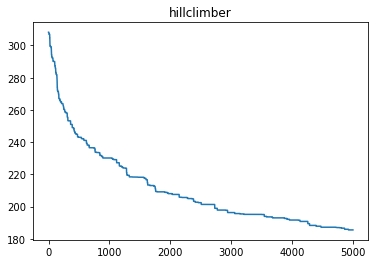

In [13]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [15]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.51285383859653
Penalties are: 286.9601111508132


### Optimization of Noord (N)

In [16]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 234.15188944296528
Penalties are: 397.382949366464
Average distance is : 246.01889807216554
Penalties are: 385.2746243359175
Average distance is : 242.44307173965024
Penalties are: 390.86624829302843
Average distance is : 240.23301502023918
Penalties are: 380.5522362617854
Average distance is : 241.23008647964917
Penalties are: 391.5664824254984
Average distance is : 245.53666152829064
Penalties are: 386.7238176764596
Average distance is : 244.57547207516322
Penalties are: 395.03356978992014
Average distance is : 247.62461317454105
Penalties are: 388.11474843999133
Average distance is : 239.60972980617325
Penalties are: 388.40844980520245
Averag

Average distance is : 234.23132480590436
Penalties are: 372.1460883937027
372.1460883937027 373.7531703361742
44.0
Amount of clusters to change: 14
Average distance is : 234.0456410124754
Penalties are: 372.5985981889204
372.5985981889204 372.1460883937027
15.0
Amount of clusters to change: 19
Average distance is : 234.57623495055716
Penalties are: 373.14011641808713
373.14011641808713 372.1460883937027
17.0
Amount of clusters to change: 21
Average distance is : 233.95088603342467
Penalties are: 369.21563584083015
369.21563584083015 372.1460883937027
49.0
Amount of clusters to change: 21
Average distance is : 236.53928459792027
Penalties are: 374.78396739859534
374.78396739859534 369.21563584083015
20.0
Amount of clusters to change: 21
Average distance is : 235.48362585092303
Penalties are: 372.745870797822
372.745870797822 369.21563584083015
23.0
Amount of clusters to change: 15
Average distance is : 233.10580192842374
Penalties are: 369.15416021543564
369.15416021543564 369.215635840

Average distance is : 234.06797215010147
Penalties are: 364.81271630366166
364.81271630366166 359.5625414693813
40.0
Amount of clusters to change: 18
Average distance is : 231.06644763738433
Penalties are: 361.49252179016725
361.49252179016725 359.5625414693813
15.0
Amount of clusters to change: 21
Average distance is : 229.87735536843593
Penalties are: 360.18279959753784
360.18279959753784 359.5625414693813
11.0
Amount of clusters to change: 14
Average distance is : 230.84634506699066
Penalties are: 359.44407510653406
359.44407510653406 359.5625414693813
20.0
Amount of clusters to change: 20
Average distance is : 232.52103433343018
Penalties are: 363.9694484986585
363.9694484986585 359.44407510653406
20.0
Amount of clusters to change: 25
Average distance is : 228.49534401631007
Penalties are: 355.4589289279514
355.4589289279514 359.44407510653406
13.0
Amount of clusters to change: 21
Average distance is : 229.9091695316946
Penalties are: 355.14378832267994
355.14378832267994 355.45892

Average distance is : 233.45065299691916
Penalties are: 355.33733855153093
355.33733855153093 351.6343146504103
13.0
Amount of clusters to change: 14
Average distance is : 233.22886314501386
Penalties are: 353.0527410333807
353.0527410333807 351.6343146504103
12.0
Amount of clusters to change: 19
Average distance is : 232.93468385254528
Penalties are: 352.6583314985795
352.6583314985795 351.6343146504103
22.0
Amount of clusters to change: 23
Average distance is : 233.7854240683528
Penalties are: 358.15041279000945
358.15041279000945 351.6343146504103
23.0
Amount of clusters to change: 20
Average distance is : 234.20925456735552
Penalties are: 353.4955936217645
353.4955936217645 351.6343146504103
15.0
Amount of clusters to change: 17
Average distance is : 234.0036326690507
Penalties are: 355.38228275923296
355.38228275923296 351.6343146504103
17.0
Amount of clusters to change: 19
Average distance is : 233.52502059663215
Penalties are: 355.79088695549245
355.79088695549245 351.6343146504

Average distance is : 233.5413681934918
Penalties are: 347.26921510022095
347.26921510022095 344.24775749684346
31.0
Amount of clusters to change: 28
Average distance is : 232.65723489769508
Penalties are: 347.809076724274
347.809076724274 344.24775749684346
33.0
Amount of clusters to change: 17
Average distance is : 231.2392790763793
Penalties are: 344.2447024739584
344.2447024739584 344.24775749684346
16.0
Amount of clusters to change: 22
Average distance is : 231.85312536653308
Penalties are: 345.21324927990844
345.21324927990844 344.2447024739584
20.0
Amount of clusters to change: 23
Average distance is : 232.03598587663882
Penalties are: 346.2058234098801
346.2058234098801 344.2447024739584
21.0
Amount of clusters to change: 27
Average distance is : 231.25957508243368
Penalties are: 349.4589283656881
349.4589283656881 344.2447024739584
11.0
Amount of clusters to change: 19
Average distance is : 232.05209189913307
Penalties are: 346.76790504655935
346.76790504655935 344.24470247395

Average distance is : 231.5059885417126
Penalties are: 344.4355590770991
344.4355590770991 342.2983506155303
21.0
Amount of clusters to change: 23
Average distance is : 231.61572016918504
Penalties are: 343.12719453322285
343.12719453322285 342.2983506155303
27.0
Amount of clusters to change: 22
Average distance is : 233.69184135279355
Penalties are: 342.9211142676768
342.9211142676768 342.2983506155303
17.0
Amount of clusters to change: 16
Average distance is : 229.613368046863
Penalties are: 345.3918939492582
345.3918939492582 342.2983506155303
20.0
Amount of clusters to change: 17
Average distance is : 231.87719835505385
Penalties are: 340.34330676886043
340.34330676886043 342.2983506155303
13.0
Amount of clusters to change: 15
Average distance is : 232.18893101352927
Penalties are: 341.4973198390151
341.4973198390151 340.34330676886043
17.0
Amount of clusters to change: 17
Average distance is : 232.11010869091726
Penalties are: 341.02388670888575
341.02388670888575 340.343306768860

Average distance is : 233.08941305610463
Penalties are: 346.656743864759
346.656743864759 339.3442239092358
9.0
Amount of clusters to change: 14
Average distance is : 232.1581878503409
Penalties are: 340.51854887528776
340.51854887528776 339.3442239092358
19.0
Amount of clusters to change: 24
Average distance is : 235.57251798884448
Penalties are: 344.0227752740441
344.0227752740441 339.3442239092358
14.0
Amount of clusters to change: 15
Average distance is : 233.155720100291
Penalties are: 343.40088163462104
343.40088163462104 339.3442239092358
23.0
Amount of clusters to change: 25
Average distance is : 233.23734130090605
Penalties are: 343.3072014484767
343.3072014484767 339.3442239092358
33.0
Amount of clusters to change: 30
Average distance is : 232.25070035735337
Penalties are: 346.4849587900734
346.4849587900734 339.3442239092358
27.0
Amount of clusters to change: 22
Average distance is : 235.77004879977832
Penalties are: 344.90225858540134
344.90225858540134 339.3442239092358
10

Average distance is : 231.64410652642547
Penalties are: 340.6332963218074
340.6332963218074 338.1767383740382
26.0
Amount of clusters to change: 24
Average distance is : 231.87259055372058
Penalties are: 342.8889353315097
342.8889353315097 338.1767383740382
23.0
Amount of clusters to change: 35
Average distance is : 233.40449359041574
Penalties are: 354.7571411941826
354.7571411941826 338.1767383740382
18.0
Amount of clusters to change: 19
Average distance is : 230.95126254164728
Penalties are: 337.9315574065692
337.9315574065692 338.1767383740382
30.0
Amount of clusters to change: 18
Average distance is : 231.44515443233217
Penalties are: 340.63256166728985
340.63256166728985 337.9315574065692
20.0
Amount of clusters to change: 22
Average distance is : 230.93707410615232
Penalties are: 338.0797989687679
338.0797989687679 337.9315574065692
21.0
Amount of clusters to change: 23
Average distance is : 231.77263119554186
Penalties are: 341.11410940329057
341.11410940329057 337.931557406569

Average distance is : 231.43652105877783
Penalties are: 338.4283698758192
338.4283698758192 335.55921856611496
8.0
Amount of clusters to change: 15
Average distance is : 230.30757267227392
Penalties are: 335.18164843642376
335.18164843642376 335.55921856611496
23.0
Amount of clusters to change: 25
Average distance is : 231.99458008798314
Penalties are: 339.05136705173874
339.05136705173874 335.18164843642376
11.0
Amount of clusters to change: 15
Average distance is : 231.33300128943353
Penalties are: 340.1599212111074
340.1599212111074 335.18164843642376
18.0
Amount of clusters to change: 19
Average distance is : 230.57473141928529
Penalties are: 336.29107818865253
336.29107818865253 335.18164843642376
42.0
Amount of clusters to change: 16
Average distance is : 230.4307637168235
Penalties are: 335.62646260799403
335.62646260799403 335.18164843642376
19.0
Amount of clusters to change: 22
Average distance is : 231.73844606845378
Penalties are: 336.6772139511543
336.6772139511543 335.1816

Average distance is : 231.84955895276397
Penalties are: 333.3463224076516
333.3463224076516 331.1757606124417
15.0
Amount of clusters to change: 19
Average distance is : 232.47994297694038
Penalties are: 335.64172041603524
335.64172041603524 331.1757606124417
17.0
Amount of clusters to change: 16
Average distance is : 232.9812897258048
Penalties are: 336.57676347588216
336.57676347588216 331.1757606124417
19.0
Amount of clusters to change: 18
Average distance is : 231.05456612623396
Penalties are: 334.79490428630464
334.79490428630464 331.1757606124417
21.0
Amount of clusters to change: 18
Average distance is : 230.133897520995
Penalties are: 330.80528922716627
330.80528922716627 331.1757606124417
26.0
Amount of clusters to change: 26
Average distance is : 233.4581963850501
Penalties are: 340.9342235549957
340.9342235549957 330.80528922716627
15.0
Amount of clusters to change: 18
Average distance is : 230.2643872041699
Penalties are: 333.8832272843564
333.8832272843564 330.805289227166

Average distance is : 232.12475253255974
Penalties are: 335.4047539114007
335.4047539114007 330.704080973373
26.0
Amount of clusters to change: 19
Average distance is : 230.7275148888267
Penalties are: 330.4723323066932
330.4723323066932 330.704080973373
20.0
Amount of clusters to change: 30
Average distance is : 231.92351088275782
Penalties are: 337.00399461751914
337.00399461751914 330.4723323066932
23.0
Amount of clusters to change: 18
Average distance is : 230.6889146418901
Penalties are: 333.8436743943479
333.8436743943479 330.4723323066932
55.0
Amount of clusters to change: 27
Average distance is : 233.24078193089338
Penalties are: 340.106456487513
340.106456487513 330.4723323066932
16.0
Amount of clusters to change: 16
Average distance is : 231.214493596762
Penalties are: 333.91112980930075
333.91112980930075 330.4723323066932
24.0
Amount of clusters to change: 26
Average distance is : 232.1061807674298
Penalties are: 334.5860588136894
334.5860588136894 330.4723323066932
13.0
Am

Average distance is : 234.77420254774182
Penalties are: 334.1800127170361
334.1800127170361 329.5282669987008
21.0
Amount of clusters to change: 23
Average distance is : 233.27667943534516
Penalties are: 332.85259753336743
332.85259753336743 329.5282669987008
15.0
Amount of clusters to change: 21
Average distance is : 238.27468454344861
Penalties are: 341.2040029922438
341.2040029922438 329.5282669987008
20.0
Amount of clusters to change: 16
Average distance is : 232.79960744015108
Penalties are: 330.58574594472225
330.58574594472225 329.5282669987008
17.0
Amount of clusters to change: 18
Average distance is : 233.16492800109995
Penalties are: 329.84593663136343
329.84593663136343 329.5282669987008
9.0
Amount of clusters to change: 18
Average distance is : 235.30180202000972
Penalties are: 337.41797959565343
337.41797959565343 329.5282669987008
18.0
Amount of clusters to change: 28
Average distance is : 232.28399947710915
Penalties are: 331.67337459151935
331.67337459151935 329.5282669

Average distance is : 233.45409749729876
Penalties are: 332.77472603252096
332.77472603252096 327.70763926729404
22.0
Amount of clusters to change: 19
Average distance is : 234.23392446811292
Penalties are: 334.00746443757623
334.00746443757623 327.70763926729404
7.0
Amount of clusters to change: 14
Average distance is : 233.78757696568718
Penalties are: 329.6616445529352
329.6616445529352 327.70763926729404
14.0
Amount of clusters to change: 14
Average distance is : 233.17141537071058
Penalties are: 331.06535901019726
331.06535901019726 327.70763926729404
14.0
Amount of clusters to change: 12
Average distance is : 232.91447336511916
Penalties are: 329.20643047954644
329.20643047954644 327.70763926729404
22.0
Amount of clusters to change: 19
Average distance is : 233.2218086428157
Penalties are: 332.2534848911374
332.2534848911374 327.70763926729404
8.0
Amount of clusters to change: 15
Average distance is : 232.98746966428718
Penalties are: 330.4796066380566
330.4796066380566 327.70763

Average distance is : 233.03113787883242
Penalties are: 331.3567971081539
331.3567971081539 327.1844289440529
24.0
Amount of clusters to change: 17
Average distance is : 235.5268118352936
Penalties are: 328.8064227922359
328.8064227922359 327.1844289440529
19.0
Amount of clusters to change: 26
Average distance is : 232.38202643960955
Penalties are: 328.5349854226544
328.5349854226544 327.1844289440529
15.0
Amount of clusters to change: 20
Average distance is : 233.033704515229
Penalties are: 333.08899376943975
333.08899376943975 327.1844289440529
22.0
Amount of clusters to change: 19
Average distance is : 232.08855366942177
Penalties are: 330.3498405252176
330.3498405252176 327.1844289440529
25.0
Amount of clusters to change: 20
Average distance is : 234.4786828856477
Penalties are: 330.67199435596865
330.67199435596865 327.1844289440529
17.0
Amount of clusters to change: 19
Average distance is : 231.075656278053
Penalties are: 331.47679184219857
331.47679184219857 327.1844289440529
12

Average distance is : 232.71540722103106
Penalties are: 328.9368383893067
328.9368383893067 326.2632453541478
17.0
Amount of clusters to change: 14
Average distance is : 232.0071172299149
Penalties are: 328.3706772117012
328.3706772117012 326.2632453541478
10.0
Amount of clusters to change: 20
Average distance is : 231.9690297016219
Penalties are: 328.93913089098
328.93913089098 326.2632453541478
24.0
Amount of clusters to change: 22
Average distance is : 231.66798605013418
Penalties are: 327.4188798673176
327.4188798673176 326.2632453541478
18.0
Amount of clusters to change: 21
Average distance is : 232.20483704008458
Penalties are: 330.8890278751132
330.8890278751132 326.2632453541478
24.0
Amount of clusters to change: 23
Average distance is : 231.80369826783527
Penalties are: 328.52663563526124
328.52663563526124 326.2632453541478
37.0
Amount of clusters to change: 28
Average distance is : 232.4204176344014
Penalties are: 331.37102634946257
331.37102634946257 326.2632453541478
15.0


Average distance is : 232.1975441112524
Penalties are: 329.9154660222843
329.9154660222843 325.6299358734596
18.0
Amount of clusters to change: 19
Average distance is : 234.0754922757115
Penalties are: 328.18985724831686
328.18985724831686 325.6299358734596
25.0
Amount of clusters to change: 21
Average distance is : 232.3704307300805
Penalties are: 330.7720578467656
330.7720578467656 325.6299358734596
20.0
Amount of clusters to change: 23
Average distance is : 232.5913670024846
Penalties are: 328.5476843674948
328.5476843674948 325.6299358734596
10.0
Amount of clusters to change: 19
Average distance is : 233.09804857250663
Penalties are: 328.2083590790976
328.2083590790976 325.6299358734596
5.0
Amount of clusters to change: 9
Average distance is : 232.05582021186726
Penalties are: 327.81969946651446
327.81969946651446 325.6299358734596
7.0
Amount of clusters to change: 12
Average distance is : 233.5264856497202
Penalties are: 327.8343815110831
327.8343815110831 325.6299358734596
22.0
A

Average distance is : 231.63882135698424
Penalties are: 321.96574416315605
321.96574416315605 325.28940458285757
24.0
Amount of clusters to change: 28
Average distance is : 231.1572219912677
Penalties are: 323.90041843182803
323.90041843182803 321.96574416315605
15.0
Amount of clusters to change: 15
Average distance is : 231.64880802955528
Penalties are: 327.9789608744439
327.9789608744439 321.96574416315605
10.0
Amount of clusters to change: 17
Average distance is : 230.6779882225374
Penalties are: 322.6406274459625
322.6406274459625 321.96574416315605
12.0
Amount of clusters to change: 11
Average distance is : 231.72085441528526
Penalties are: 322.09281399858264
322.09281399858264 321.96574416315605
12.0
Amount of clusters to change: 15
Average distance is : 232.48196813014783
Penalties are: 324.33553025709676
324.33553025709676 321.96574416315605
14.0
Amount of clusters to change: 20
Average distance is : 231.78466600823927
Penalties are: 326.26077785542736
326.26077785542736 321.96

Average distance is : 231.8501902821763
Penalties are: 330.24488853905524
330.24488853905524 320.2157426945495
31.0
Amount of clusters to change: 29
Average distance is : 229.08271926687408
Penalties are: 322.2366180046981
322.2366180046981 320.2157426945495
27.0
Amount of clusters to change: 16
Average distance is : 233.03057334898915
Penalties are: 326.21965397566163
326.21965397566163 320.2157426945495
20.0
Amount of clusters to change: 17
Average distance is : 230.25596721985875
Penalties are: 321.0799121573724
321.0799121573724 320.2157426945495
40.0
Amount of clusters to change: 20
Average distance is : 231.56116139018462
Penalties are: 323.50771816910833
323.50771816910833 320.2157426945495
12.0
Amount of clusters to change: 22
Average distance is : 230.5542323566364
Penalties are: 322.763809359247
322.763809359247 320.2157426945495
15.0
Amount of clusters to change: 17
Average distance is : 230.22764914277437
Penalties are: 320.8907960676591
320.8907960676591 320.2157426945495


Average distance is : 231.15672469524642
Penalties are: 316.546646942684
316.546646942684 316.94357507551973
14.0
Amount of clusters to change: 13
Average distance is : 232.1560111661489
Penalties are: 317.9399483585684
317.9399483585684 316.546646942684
18.0
Amount of clusters to change: 20
Average distance is : 233.11515788657334
Penalties are: 321.82299201366266
321.82299201366266 316.546646942684
18.0
Amount of clusters to change: 18
Average distance is : 231.33124871226306
Penalties are: 324.76033723271934
324.76033723271934 316.546646942684
31.0
Amount of clusters to change: 21
Average distance is : 234.1148753456937
Penalties are: 320.659821664791
320.659821664791 316.546646942684
22.0
Amount of clusters to change: 24
Average distance is : 231.78222720096224
Penalties are: 322.54473110031785
322.54473110031785 316.546646942684
16.0
Amount of clusters to change: 18
Average distance is : 231.3383163224362
Penalties are: 321.38109054472943
321.38109054472943 316.546646942684
13.0
A

Average distance is : 231.577263268864
Penalties are: 319.54227149598216
319.54227149598216 316.546646942684
30.0
Amount of clusters to change: 18
Average distance is : 232.4422915720326
Penalties are: 325.723450492606
325.723450492606 316.546646942684
11.0
Amount of clusters to change: 11
Average distance is : 231.12577079602227
Penalties are: 319.5859231870324
319.5859231870324 316.546646942684
20.0
Amount of clusters to change: 20
Average distance is : 231.99562535601763
Penalties are: 323.76876936355745
323.76876936355745 316.546646942684
19.0
Amount of clusters to change: 22
Average distance is : 231.5135508606628
Penalties are: 320.6777370530514
320.6777370530514 316.546646942684
10.0
Amount of clusters to change: 15
Average distance is : 231.60381248275897
Penalties are: 318.92757744476694
318.92757744476694 316.546646942684
21.0
Amount of clusters to change: 24
Average distance is : 231.1921851305527
Penalties are: 318.3714813717941
318.3714813717941 316.546646942684
13.0
Amoun

Average distance is : 230.96846083786087
Penalties are: 319.56683573219607
319.56683573219607 312.94263395131196
17.0
Amount of clusters to change: 21
Average distance is : 229.87097718081586
Penalties are: 323.30855542173435
323.30855542173435 312.94263395131196
13.0
Amount of clusters to change: 18
Average distance is : 228.59947659480315
Penalties are: 314.1452892159766
314.1452892159766 312.94263395131196
16.0
Amount of clusters to change: 22
Average distance is : 231.71126606859286
Penalties are: 323.0870119153389
323.0870119153389 312.94263395131196
18.0
Amount of clusters to change: 13
Average distance is : 228.69098077952506
Penalties are: 314.8232413867993
314.8232413867993 312.94263395131196
22.0
Amount of clusters to change: 10
Average distance is : 229.26898274387193
Penalties are: 316.3525787675966
316.3525787675966 312.94263395131196
21.0
Amount of clusters to change: 20
Average distance is : 228.67608813681775
Penalties are: 314.2548927027186
314.2548927027186 312.942633

Average distance is : 229.00041977346794
Penalties are: 313.7926413749531
313.7926413749531 311.3815989061975
28.0
Amount of clusters to change: 26
Average distance is : 228.57971216881273
Penalties are: 314.5269494165729
314.5269494165729 311.3815989061975
12.0
Amount of clusters to change: 18
Average distance is : 226.33854762164114
Penalties are: 312.06775935359036
312.06775935359036 311.3815989061975
12.0
Amount of clusters to change: 20
Average distance is : 229.48390593811598
Penalties are: 313.98078000552823
313.98078000552823 311.3815989061975
16.0
Amount of clusters to change: 22
Average distance is : 230.05139904171344
Penalties are: 318.108361416048
318.108361416048 311.3815989061975
17.0
Amount of clusters to change: 21
Average distance is : 226.65278283603396
Penalties are: 314.0056654164282
314.0056654164282 311.3815989061975
21.0
Amount of clusters to change: 21
Average distance is : 229.9237727713334
Penalties are: 317.04012205571684
317.04012205571684 311.3815989061975

Average distance is : 229.37210907250972
Penalties are: 323.3398882970328
323.3398882970328 310.89142631641295
35.0
Amount of clusters to change: 25
Average distance is : 228.33306561929047
Penalties are: 316.33076694037067
316.33076694037067 310.89142631641295
16.0
Amount of clusters to change: 23
Average distance is : 228.82898484158392
Penalties are: 314.4199211040692
314.4199211040692 310.89142631641295
21.0
Amount of clusters to change: 14
Average distance is : 227.84362486474194
Penalties are: 312.12313894647474
312.12313894647474 310.89142631641295
16.0
Amount of clusters to change: 18
Average distance is : 229.56407167369983
Penalties are: 312.9692894627732
312.9692894627732 310.89142631641295
33.0
Amount of clusters to change: 20
Average distance is : 229.67295574042774
Penalties are: 317.72990833975
317.72990833975 310.89142631641295
28.0
Amount of clusters to change: 31
Average distance is : 229.62597583990134
Penalties are: 317.4513185946415
317.4513185946415 310.8914263164

Average distance is : 229.83148990400272
Penalties are: 314.86866888783584
314.86866888783584 310.89142631641295
15.0
Amount of clusters to change: 20
Average distance is : 228.29756974803587
Penalties are: 312.5805444727438
312.5805444727438 310.89142631641295
18.0
Amount of clusters to change: 22
Average distance is : 228.31811092778415
Penalties are: 313.4491879207882
313.4491879207882 310.89142631641295
25.0
Amount of clusters to change: 28
Average distance is : 228.83448518748625
Penalties are: 314.39953697012777
314.39953697012777 310.89142631641295
18.0
Amount of clusters to change: 25
Average distance is : 229.73426188399043
Penalties are: 312.503552103694
312.503552103694 310.89142631641295
16.0
Amount of clusters to change: 25
Average distance is : 228.11372706682937
Penalties are: 314.916212431141
314.916212431141 310.89142631641295
26.0
Amount of clusters to change: 27
Average distance is : 228.5412773310464
Penalties are: 314.8881222136666
314.8881222136666 310.89142631641

Average distance is : 228.67807786404407
Penalties are: 314.91586748652753
314.91586748652753 310.5871189916896
13.0
Amount of clusters to change: 20
Average distance is : 229.27280486204378
Penalties are: 315.94941940227795
315.94941940227795 310.5871189916896
9.0
Amount of clusters to change: 17
Average distance is : 228.59945738678738
Penalties are: 314.999977022839
314.999977022839 310.5871189916896
21.0
Amount of clusters to change: 23
Average distance is : 229.45046576723743
Penalties are: 313.0410569494068
313.0410569494068 310.5871189916896
10.0
Amount of clusters to change: 10
Average distance is : 227.49045848334356
Penalties are: 312.40600063167454
312.40600063167454 310.5871189916896
19.0
Amount of clusters to change: 24
Average distance is : 227.7702068256542
Penalties are: 312.7155368443909
312.7155368443909 310.5871189916896
8.0
Amount of clusters to change: 9
Average distance is : 227.64265527362863
Penalties are: 310.7074796186265
310.7074796186265 310.5871189916896
16

Average distance is : 228.44765199327134
Penalties are: 312.3756863834659
312.3756863834659 310.5871189916896
18.0
Amount of clusters to change: 18
Average distance is : 227.14030271420816
Penalties are: 314.1876394125427
314.1876394125427 310.5871189916896
22.0
Amount of clusters to change: 24
Average distance is : 229.22021914886312
Penalties are: 323.06863232594407
323.06863232594407 310.5871189916896
18.0
Amount of clusters to change: 20
Average distance is : 228.38323773453348
Penalties are: 313.6335301032393
313.6335301032393 310.5871189916896
14.0
Amount of clusters to change: 19
Average distance is : 228.34686172650544
Penalties are: 312.94404692157366
312.94404692157366 310.5871189916896
21.0
Amount of clusters to change: 17
Average distance is : 228.42512528994183
Penalties are: 313.2748355573541
313.2748355573541 310.5871189916896
8.0
Amount of clusters to change: 16
Average distance is : 225.47964375171367
Penalties are: 313.5690189008863
313.5690189008863 310.5871189916896

Average distance is : 228.99442989557605
Penalties are: 309.44666313981725
309.44666313981725 307.6895967350323
12.0
Amount of clusters to change: 17
Average distance is : 225.43362827327914
Penalties are: 313.19386796028346
313.19386796028346 307.6895967350323
20.0
Amount of clusters to change: 20
Average distance is : 227.82113306418748
Penalties are: 311.07278419431884
311.07278419431884 307.6895967350323
17.0
Amount of clusters to change: 22
Average distance is : 225.51247140491975
Penalties are: 312.35217326634955
312.35217326634955 307.6895967350323
10.0
Amount of clusters to change: 19
Average distance is : 226.06065227059167
Penalties are: 309.82823121261765
309.82823121261765 307.6895967350323
9.0
Amount of clusters to change: 7
Average distance is : 226.29449554250058
Penalties are: 307.466258779289
307.466258779289 307.6895967350323
14.0
Amount of clusters to change: 18
Average distance is : 226.79996903150393
Penalties are: 310.087666742336
310.087666742336 307.466258779289

Average distance is : 228.87953956873534
Penalties are: 309.52978694802505
309.52978694802505 307.03756050257607
18.0
Amount of clusters to change: 18
Average distance is : 228.18668556259715
Penalties are: 310.06525461418505
310.06525461418505 307.03756050257607
15.0
Amount of clusters to change: 16
Average distance is : 229.33052659524537
Penalties are: 310.5529067293077
310.5529067293077 307.03756050257607
13.0
Amount of clusters to change: 22
Average distance is : 229.94123603278788
Penalties are: 311.41552395428255
311.41552395428255 307.03756050257607
21.0
Amount of clusters to change: 23
Average distance is : 228.8217808381031
Penalties are: 310.67708679602833
310.67708679602833 307.03756050257607
23.0
Amount of clusters to change: 24
Average distance is : 229.72558920125593
Penalties are: 309.8537340822123
309.8537340822123 307.03756050257607
18.0
Amount of clusters to change: 17
Average distance is : 227.72400470452405
Penalties are: 309.781894796581
309.781894796581 307.03756

Average distance is : 230.06312375521898
Penalties are: 320.7356173327275
320.7356173327275 307.03756050257607
16.0
Amount of clusters to change: 24
Average distance is : 228.73131359147774
Penalties are: 309.33075815748435
309.33075815748435 307.03756050257607
18.0
Amount of clusters to change: 20
Average distance is : 228.44681652894047
Penalties are: 312.3889542825559
312.3889542825559 307.03756050257607
10.0
Amount of clusters to change: 16
Average distance is : 228.06425054823058
Penalties are: 305.8236697230502
305.8236697230502 307.03756050257607
18.0
Amount of clusters to change: 18
Average distance is : 228.08646839163265
Penalties are: 311.83029491304603
311.83029491304603 305.8236697230502
21.0
Amount of clusters to change: 19
Average distance is : 230.765785865636
Penalties are: 306.6557740875264
306.6557740875264 305.8236697230502
8.0
Amount of clusters to change: 15
Average distance is : 227.84854487424815
Penalties are: 310.87256552636256
310.87256552636256 305.823669723

Average distance is : 230.32614112507406
Penalties are: 319.86356074932394
319.86356074932394 304.61908531554116
14.0
Amount of clusters to change: 18
Average distance is : 226.59467873114198
Penalties are: 305.8296568230719
305.8296568230719 304.61908531554116
13.0
Amount of clusters to change: 15
Average distance is : 226.88306043766323
Penalties are: 305.4653312540714
305.4653312540714 304.61908531554116
17.0
Amount of clusters to change: 19
Average distance is : 227.5037536016246
Penalties are: 307.6083861209262
307.6083861209262 304.61908531554116
13.0
Amount of clusters to change: 17
Average distance is : 227.29849725399566
Penalties are: 310.37985481355736
310.37985481355736 304.61908531554116
37.0
Amount of clusters to change: 20
Average distance is : 229.49549962245374
Penalties are: 310.2591107503109
310.2591107503109 304.61908531554116
33.0
Amount of clusters to change: 24
Average distance is : 229.76114140511726
Penalties are: 312.9063656704633
312.9063656704633 304.6190853

Average distance is : 227.7890866854223
Penalties are: 314.70716565664543
314.70716565664543 304.22944966343596
13.0
Amount of clusters to change: 15
Average distance is : 226.89955120381393
Penalties are: 307.06228054245054
307.06228054245054 304.22944966343596
21.0
Amount of clusters to change: 19
Average distance is : 228.79414336868402
Penalties are: 310.8312698928127
310.8312698928127 304.22944966343596
20.0
Amount of clusters to change: 22
Average distance is : 226.9862370898326
Penalties are: 306.7594410173908
306.7594410173908 304.22944966343596
15.0
Amount of clusters to change: 17
Average distance is : 228.88067927862278
Penalties are: 310.12483222132295
310.12483222132295 304.22944966343596
13.0
Amount of clusters to change: 25
Average distance is : 226.77373003434917
Penalties are: 308.91699047553243
308.91699047553243 304.22944966343596
28.0
Amount of clusters to change: 20
Average distance is : 227.3256062505602
Penalties are: 313.8519573323595
313.8519573323595 304.22944

Average distance is : 227.84563833507593
Penalties are: 310.6476602281924
310.6476602281924 304.22944966343596
17.0
Amount of clusters to change: 21
Average distance is : 228.41473826588376
Penalties are: 308.4669069760556
308.4669069760556 304.22944966343596
21.0
Amount of clusters to change: 16
Average distance is : 227.82306782289237
Penalties are: 309.82040926587575
309.82040926587575 304.22944966343596
17.0
Amount of clusters to change: 18
Average distance is : 227.7150326258558
Penalties are: 307.30967620758406
307.30967620758406 304.22944966343596
25.0
Amount of clusters to change: 25
Average distance is : 228.14766860635876
Penalties are: 315.6364813261217
315.6364813261217 304.22944966343596
21.0
Amount of clusters to change: 17
Average distance is : 228.43503248246859
Penalties are: 308.7016755857794
308.7016755857794 304.22944966343596
33.0
Amount of clusters to change: 25
Average distance is : 227.7746444513863
Penalties are: 312.25195072938664
312.25195072938664 304.229449

Average distance is : 227.31952265277877
Penalties are: 308.4120653487041
308.4120653487041 304.13142741664865
55.0
Amount of clusters to change: 25
Average distance is : 225.98672591598154
Penalties are: 307.886483142186
307.886483142186 304.13142741664865
4.0
Amount of clusters to change: 11
Average distance is : 226.65021005926243
Penalties are: 307.5360608677629
307.5360608677629 304.13142741664865
14.0
Amount of clusters to change: 13
Average distance is : 227.55960292055875
Penalties are: 311.9918413707337
311.9918413707337 304.13142741664865
25.0
Amount of clusters to change: 25
Average distance is : 228.08786256194207
Penalties are: 313.7523326259895
313.7523326259895 304.13142741664865
15.0
Amount of clusters to change: 19
Average distance is : 227.70762534627048
Penalties are: 307.6665379103417
307.6665379103417 304.13142741664865
22.0
Amount of clusters to change: 23
Average distance is : 230.24751820064836
Penalties are: 310.7335908426933
310.7335908426933 304.1314274166486

Average distance is : 227.4599832892946
Penalties are: 305.54741279930516
305.54741279930516 304.13142741664865
15.0
Amount of clusters to change: 23
Average distance is : 228.1881629977494
Penalties are: 304.0784735387592
304.0784735387592 304.13142741664865
13.0
Amount of clusters to change: 14
Average distance is : 229.64397925899397
Penalties are: 309.5370380978701
309.5370380978701 304.0784735387592
23.0
Amount of clusters to change: 27
Average distance is : 229.55028349048723
Penalties are: 306.1398091355929
306.1398091355929 304.0784735387592
21.0
Amount of clusters to change: 25
Average distance is : 228.58075907223486
Penalties are: 308.9248871572672
308.9248871572672 304.0784735387592
45.0
Amount of clusters to change: 21
Average distance is : 228.99552506981814
Penalties are: 311.5941453443613
311.5941453443613 304.0784735387592
35.0
Amount of clusters to change: 21
Average distance is : 229.75726506712573
Penalties are: 311.91590703527504
311.91590703527504 304.078473538759

Average distance is : 228.73841024989636
Penalties are: 309.8210884146944
309.8210884146944 304.0784735387592
21.0
Amount of clusters to change: 19
Average distance is : 227.63081287234112
Penalties are: 306.90669347993446
306.90669347993446 304.0784735387592
20.0
Amount of clusters to change: 26
Average distance is : 228.25488596301716
Penalties are: 308.0959639254624
308.0959639254624 304.0784735387592
15.0
Amount of clusters to change: 15
Average distance is : 229.01481949208747
Penalties are: 309.0671326319114
309.0671326319114 304.0784735387592
30.0
Amount of clusters to change: 22
Average distance is : 227.29397454617174
Penalties are: 311.45223428216116
311.45223428216116 304.0784735387592
6.0
Amount of clusters to change: 12
Average distance is : 228.37014012534925
Penalties are: 303.94150080933304
303.94150080933304 304.0784735387592
14.0
Amount of clusters to change: 15
Average distance is : 227.43283724997363
Penalties are: 305.47074279002743
305.47074279002743 303.941500809

Average distance is : 228.4750037707483
Penalties are: 303.320288912138
303.320288912138 302.8400955210327
23.0
Amount of clusters to change: 23
Average distance is : 230.21630548222458
Penalties are: 308.08817966205413
308.08817966205413 302.8400955210327
8.0
Amount of clusters to change: 15
Average distance is : 228.91016143189785
Penalties are: 307.9142639215144
307.9142639215144 302.8400955210327
22.0
Amount of clusters to change: 24
Average distance is : 228.19070512583804
Penalties are: 303.3050109457352
303.3050109457352 302.8400955210327
30.0
Amount of clusters to change: 24
Average distance is : 229.4370078205103
Penalties are: 306.97220593576657
306.97220593576657 302.8400955210327
15.0
Amount of clusters to change: 22
Average distance is : 230.99682961814145
Penalties are: 307.2863722536963
307.2863722536963 302.8400955210327
8.0
Amount of clusters to change: 19
Average distance is : 229.85384794499473
Penalties are: 310.40341006533885
310.40341006533885 302.8400955210327
23

Average distance is : 227.31616263180774
Penalties are: 303.8383944313942
303.8383944313942 301.0801258216703
15.0
Amount of clusters to change: 18
Average distance is : 226.59981938863376
Penalties are: 305.9288785803115
305.9288785803115 301.0801258216703
13.0
Amount of clusters to change: 16
Average distance is : 226.99981961548164
Penalties are: 301.6795797192996
301.6795797192996 301.0801258216703
17.0
Amount of clusters to change: 21
Average distance is : 227.71001374808722
Penalties are: 307.0507823881245
307.0507823881245 301.0801258216703
27.0
Amount of clusters to change: 25
Average distance is : 227.843294278005
Penalties are: 313.1195247340058
313.1195247340058 301.0801258216703
14.0
Amount of clusters to change: 20
Average distance is : 228.11317977838613
Penalties are: 307.1103978661245
307.1103978661245 301.0801258216703
27.0
Amount of clusters to change: 26
Average distance is : 227.10428135329332
Penalties are: 309.63004433001896
309.63004433001896 301.0801258216703
19

Average distance is : 228.80918347232483
Penalties are: 302.6241652322391
302.6241652322391 299.3200373773663
16.0
Amount of clusters to change: 16
Average distance is : 228.4548551096952
Penalties are: 300.6539483408674
300.6539483408674 299.3200373773663
48.0
Amount of clusters to change: 19
Average distance is : 229.16848293508795
Penalties are: 303.39066842022146
303.39066842022146 299.3200373773663
13.0
Amount of clusters to change: 16
Average distance is : 229.72823134520985
Penalties are: 303.0598403541326
303.0598403541326 299.3200373773663
21.0
Amount of clusters to change: 12
Average distance is : 228.82398208476548
Penalties are: 302.18355306066053
302.18355306066053 299.3200373773663
12.0
Amount of clusters to change: 14
Average distance is : 230.81533600870918
Penalties are: 304.77097367693796
304.77097367693796 299.3200373773663
51.0
Amount of clusters to change: 25
Average distance is : 228.53842814780774
Penalties are: 303.00338721648666
303.00338721648666 299.320037377

Average distance is : 231.31028032074389
Penalties are: 310.71139681004365
310.71139681004365 299.3200373773663
31.0
Amount of clusters to change: 27
Average distance is : 228.56529589076814
Penalties are: 302.1228937997197
302.1228937997197 299.3200373773663
14.0
Amount of clusters to change: 22
Average distance is : 227.55909924668035
Penalties are: 300.4894863795179
300.4894863795179 299.3200373773663
29.0
Amount of clusters to change: 28
Average distance is : 230.99196954684504
Penalties are: 320.7132710772025
320.7132710772025 299.3200373773663
15.0
Amount of clusters to change: 19
Average distance is : 228.23852842391523
Penalties are: 302.87650857695576
302.87650857695576 299.3200373773663
14.0
Amount of clusters to change: 14
Average distance is : 229.73638448473048
Penalties are: 308.95292778183534
308.95292778183534 299.3200373773663
40.0
Amount of clusters to change: 19
Average distance is : 228.63528390064232
Penalties are: 300.0931837481987
300.0931837481987 299.3200373773

Average distance is : 228.59041458816716
Penalties are: 302.22366960461125
302.22366960461125 298.32037570816635
25.0
Amount of clusters to change: 13
Average distance is : 229.58371116799606
Penalties are: 303.7595363410253
303.7595363410253 298.32037570816635
23.0
Amount of clusters to change: 23
Average distance is : 229.178787628356
Penalties are: 300.0545230462504
300.0545230462504 298.32037570816635
25.0
Amount of clusters to change: 23
Average distance is : 230.26335155163926
Penalties are: 303.7110203320239
303.7110203320239 298.32037570816635
16.0
Amount of clusters to change: 17
Average distance is : 231.18453169389468
Penalties are: 305.21066789711597
305.21066789711597 298.32037570816635
22.0
Amount of clusters to change: 26
Average distance is : 229.57746837396337
Penalties are: 309.45182340748926
309.45182340748926 298.32037570816635
21.0
Amount of clusters to change: 17
Average distance is : 230.61486035345513
Penalties are: 304.9831226094516
304.9831226094516 298.320375

Average distance is : 229.19212814645925
Penalties are: 306.69138966422554
306.69138966422554 297.73133378076943
55.0
Amount of clusters to change: 22
Average distance is : 228.10218113271463
Penalties are: 300.1141773919738
300.1141773919738 297.73133378076943
19.0
Amount of clusters to change: 23
Average distance is : 226.96305657683735
Penalties are: 302.98599089006893
302.98599089006893 297.73133378076943
14.0
Amount of clusters to change: 20
Average distance is : 227.2034828934049
Penalties are: 297.57584444027714
297.57584444027714 297.73133378076943
14.0
Amount of clusters to change: 21
Average distance is : 229.44722522292827
Penalties are: 299.74419242385363
299.74419242385363 297.57584444027714
28.0
Amount of clusters to change: 29
Average distance is : 228.57226513867548
Penalties are: 307.5884623166663
307.5884623166663 297.57584444027714
11.0
Amount of clusters to change: 15
Average distance is : 227.56335066815944
Penalties are: 302.57429214947
302.57429214947 297.5758444

Average distance is : 227.4176874101159
Penalties are: 301.0249811287234
301.0249811287234 297.57584444027714
12.0
Amount of clusters to change: 16
Average distance is : 227.15652170239306
Penalties are: 303.3589144969305
303.3589144969305 297.57584444027714
36.0
Amount of clusters to change: 28
Average distance is : 228.04555232725954
Penalties are: 299.00200997848356
299.00200997848356 297.57584444027714
25.0
Amount of clusters to change: 23
Average distance is : 229.05620384673904
Penalties are: 308.6210617887624
308.6210617887624 297.57584444027714
13.0
Amount of clusters to change: 17
Average distance is : 229.58291286230033
Penalties are: 303.99292248169127
303.99292248169127 297.57584444027714
17.0
Amount of clusters to change: 22
Average distance is : 226.78197142429715
Penalties are: 304.4674381551156
304.4674381551156 297.57584444027714
14.0
Amount of clusters to change: 17
Average distance is : 230.23237597912802
Penalties are: 306.0533405483833
306.0533405483833 297.5758444

Average distance is : 228.22689697663006
Penalties are: 300.72858499053024
300.72858499053024 297.57584444027714
41.0
Amount of clusters to change: 25
Average distance is : 228.74394437661272
Penalties are: 301.4800174203991
301.4800174203991 297.57584444027714
35.0
Amount of clusters to change: 25
Average distance is : 230.24623601088956
Penalties are: 305.16785138869693
305.16785138869693 297.57584444027714
12.0
Amount of clusters to change: 18
Average distance is : 228.63044222102454
Penalties are: 302.2726620687618
302.2726620687618 297.57584444027714
26.0
Amount of clusters to change: 21
Average distance is : 227.2626211864562
Penalties are: 299.57120965672436
299.57120965672436 297.57584444027714
43.0
Amount of clusters to change: 25
Average distance is : 229.84307148217522
Penalties are: 306.6596447719063
306.6596447719063 297.57584444027714
26.0
Amount of clusters to change: 19
Average distance is : 227.1813212096073
Penalties are: 297.71925862137033
297.71925862137033 297.5758

Average distance is : 229.54770005003707
Penalties are: 308.9325389072031
308.9325389072031 297.57584444027714
22.0
Amount of clusters to change: 22
Average distance is : 228.524128461986
Penalties are: 306.0213374030281
306.0213374030281 297.57584444027714
15.0
Amount of clusters to change: 23
Average distance is : 227.2582250912431
Penalties are: 300.8985816538029
300.8985816538029 297.57584444027714
33.0
Amount of clusters to change: 18
Average distance is : 227.71996041559893
Penalties are: 307.61733471841126
307.61733471841126 297.57584444027714
34.0
Amount of clusters to change: 30
Average distance is : 228.74950520590323
Penalties are: 307.864429336463
307.864429336463 297.57584444027714
13.0
Amount of clusters to change: 18
Average distance is : 227.46441126033983
Penalties are: 297.66076583627785
297.66076583627785 297.57584444027714
22.0
Amount of clusters to change: 22
Average distance is : 227.34454158101533
Penalties are: 302.2900948103989
302.2900948103989 297.57584444027

Average distance is : 227.10480386408713
Penalties are: 297.3652744132336
297.3652744132336 296.7714953611402
24.0
Amount of clusters to change: 20
Average distance is : 227.82985831299095
Penalties are: 301.1531426202649
301.1531426202649 296.7714953611402
25.0
Amount of clusters to change: 20
Average distance is : 227.21292335928345
Penalties are: 299.9085744487653
299.9085744487653 296.7714953611402
25.0
Amount of clusters to change: 21
Average distance is : 227.30205487630957
Penalties are: 297.828256686867
297.828256686867 296.7714953611402
32.0
Amount of clusters to change: 23
Average distance is : 229.35888882803363
Penalties are: 308.44608351921676
308.44608351921676 296.7714953611402
17.0
Amount of clusters to change: 19
Average distance is : 228.9710888291105
Penalties are: 307.46776622120456
307.46776622120456 296.7714953611402
12.0
Amount of clusters to change: 22
Average distance is : 228.55390083604811
Penalties are: 305.0007888923982
305.0007888923982 296.7714953611402
1

Average distance is : 228.53718442806698
Penalties are: 304.5906776387216
304.5906776387216 295.94272023727274
5.0
Amount of clusters to change: 10
Average distance is : 229.42382069937128
Penalties are: 302.7845378017727
302.7845378017727 295.94272023727274
15.0
Amount of clusters to change: 21
Average distance is : 226.5873072329512
Penalties are: 312.52851704534237
312.52851704534237 295.94272023727274
11.0
Amount of clusters to change: 14
Average distance is : 228.0275328341247
Penalties are: 298.4144089796483
298.4144089796483 295.94272023727274
35.0
Amount of clusters to change: 27
Average distance is : 226.33297048438016
Penalties are: 301.920042144535
301.920042144535 295.94272023727274
11.0
Amount of clusters to change: 13
Average distance is : 228.20422002095444
Penalties are: 298.10682199928976
298.10682199928976 295.94272023727274
35.0
Amount of clusters to change: 17
Average distance is : 228.68745448871255
Penalties are: 298.88277853885785
298.88277853885785 295.942720237

Average distance is : 229.7848558605674
Penalties are: 302.99313278983
302.99313278983 295.94272023727274
15.0
Amount of clusters to change: 23
Average distance is : 226.88457125197016
Penalties are: 299.24491754673403
299.24491754673403 295.94272023727274
20.0
Amount of clusters to change: 21
Average distance is : 227.93325766674087
Penalties are: 303.82058853313333
303.82058853313333 295.94272023727274
11.0
Amount of clusters to change: 18
Average distance is : 229.7427209466643
Penalties are: 302.76251195246647
302.76251195246647 295.94272023727274
12.0
Amount of clusters to change: 16
Average distance is : 227.62813582674383
Penalties are: 296.0486005645591
296.0486005645591 295.94272023727274
22.0
Amount of clusters to change: 22
Average distance is : 229.40019454835635
Penalties are: 301.266543072307
301.266543072307 295.94272023727274
27.0
Amount of clusters to change: 23
Average distance is : 228.2412049202458
Penalties are: 304.88736107108315
304.88736107108315 295.94272023727

Average distance is : 227.4996386398605
Penalties are: 304.8499763948075
304.8499763948075 295.94272023727274
27.0
Amount of clusters to change: 27
Average distance is : 226.43762419282012
Penalties are: 295.59787871849034
295.59787871849034 295.94272023727274
23.0
Amount of clusters to change: 24
Average distance is : 227.518593104265
Penalties are: 300.51572357330383
300.51572357330383 295.59787871849034
22.0
Amount of clusters to change: 18
Average distance is : 228.1912126186617
Penalties are: 300.9334655145186
300.9334655145186 295.59787871849034
15.0
Amount of clusters to change: 19
Average distance is : 227.07902967423652
Penalties are: 298.1913084940485
298.1913084940485 295.59787871849034
13.0
Amount of clusters to change: 14
Average distance is : 226.32357741744534
Penalties are: 295.9051849720682
295.9051849720682 295.59787871849034
24.0
Amount of clusters to change: 18
Average distance is : 229.70388906493773
Penalties are: 302.9049902682643
302.9049902682643 295.5978787184

Average distance is : 228.18536847978302
Penalties are: 300.35801388696973
300.35801388696973 295.59787871849034
27.0
Amount of clusters to change: 27
Average distance is : 227.4947618147852
Penalties are: 299.5803732801674
299.5803732801674 295.59787871849034
16.0
Amount of clusters to change: 13
Average distance is : 226.19771358182103
Penalties are: 295.951478296058
295.951478296058 295.59787871849034
21.0
Amount of clusters to change: 25
Average distance is : 227.63760439027155
Penalties are: 299.3638011409621
299.3638011409621 295.59787871849034
14.0
Amount of clusters to change: 13
Average distance is : 230.26101841393677
Penalties are: 302.45315162162694
302.45315162162694 295.59787871849034
19.0
Amount of clusters to change: 22
Average distance is : 226.9845117595483
Penalties are: 297.39163161531025
297.39163161531025 295.59787871849034
26.0
Amount of clusters to change: 28
Average distance is : 226.58285062562584
Penalties are: 299.21226580666814
299.21226580666814 295.597878

Average distance is : 230.1740056265512
Penalties are: 304.7423383900196
304.7423383900196 295.0455185356995
20.0
Amount of clusters to change: 20
Average distance is : 229.10514976013945
Penalties are: 299.2579483211275
299.2579483211275 295.0455185356995
16.0
Amount of clusters to change: 21
Average distance is : 228.59610981105342
Penalties are: 306.3578060166999
306.3578060166999 295.0455185356995
13.0
Amount of clusters to change: 16
Average distance is : 227.26786515530304
Penalties are: 298.0803655026748
298.0803655026748 295.0455185356995
13.0
Amount of clusters to change: 18
Average distance is : 229.31027659409142
Penalties are: 299.27656602972814
299.27656602972814 295.0455185356995
22.0
Amount of clusters to change: 20
Average distance is : 227.40258130904957
Penalties are: 298.13306793462175
298.13306793462175 295.0455185356995
20.0
Amount of clusters to change: 22
Average distance is : 228.67928359117394
Penalties are: 299.30387797824676
299.30387797824676 295.04551853569

Average distance is : 228.5652855611832
Penalties are: 301.18288353500856
301.18288353500856 295.0455185356995
22.0
Amount of clusters to change: 15
Average distance is : 226.83111382049574
Penalties are: 301.4394962000829
301.4394962000829 295.0455185356995
47.0
Amount of clusters to change: 21
Average distance is : 227.81265402600874
Penalties are: 300.5749852049981
300.5749852049981 295.0455185356995
25.0
Amount of clusters to change: 26
Average distance is : 224.55405819694718
Penalties are: 302.8551078090764
302.8551078090764 295.0455185356995
19.0
Amount of clusters to change: 23
Average distance is : 226.43900263561423
Penalties are: 302.314657967982
302.314657967982 295.0455185356995
21.0
Amount of clusters to change: 25
Average distance is : 228.69339225930827
Penalties are: 299.62885350085867
299.62885350085867 295.0455185356995
18.0
Amount of clusters to change: 23
Average distance is : 227.39347284501352
Penalties are: 306.124083716615
306.124083716615 295.0455185356995
15.

Average distance is : 226.44370466721426
Penalties are: 300.2095158017332
300.2095158017332 295.0455185356995
21.0
Amount of clusters to change: 22
Average distance is : 226.39993076672607
Penalties are: 298.2369346216862
298.2369346216862 295.0455185356995
24.0
Amount of clusters to change: 22
Average distance is : 227.00991443382256
Penalties are: 298.1001175309422
298.1001175309422 295.0455185356995
22.0
Amount of clusters to change: 25
Average distance is : 229.51437826518026
Penalties are: 308.2736050257605
308.2736050257605 295.0455185356995
17.0
Amount of clusters to change: 20
Average distance is : 228.63241206965736
Penalties are: 302.7723686906571
302.7723686906571 295.0455185356995
15.0
Amount of clusters to change: 19
Average distance is : 229.47147430478586
Penalties are: 300.71307368878183
300.71307368878183 295.0455185356995
4.0
Amount of clusters to change: 15
Average distance is : 226.75844864326507
Penalties are: 297.95404273672995
297.95404273672995 295.0455185356995

Average distance is : 228.02431628136193
Penalties are: 297.70554457253405
297.70554457253405 294.0724096014529
18.0
Amount of clusters to change: 24
Average distance is : 230.00947670707876
Penalties are: 301.41127508438774
301.41127508438774 294.0724096014529
13.0
Amount of clusters to change: 16
Average distance is : 227.10696935036768
Penalties are: 295.79052333247796
295.79052333247796 294.0724096014529
29.0
Amount of clusters to change: 23
Average distance is : 229.3388866128324
Penalties are: 297.5296441854038
297.5296441854038 294.0724096014529
8.0
Amount of clusters to change: 16
Average distance is : 227.21282684494926
Penalties are: 294.89521614125823
294.89521614125823 294.0724096014529
20.0
Amount of clusters to change: 20
Average distance is : 227.3458187738565
Penalties are: 296.0056162478533
296.0056162478533 294.0724096014529
8.0
Amount of clusters to change: 22
Average distance is : 227.08795233750902
Penalties are: 296.4608330207861
296.4608330207861 294.072409601452

Average distance is : 228.3630707738893
Penalties are: 298.45772082946763
298.45772082946763 294.0724096014529
23.0
Amount of clusters to change: 19
Average distance is : 228.53630368443066
Penalties are: 296.9180474150694
296.9180474150694 294.0724096014529
19.0
Amount of clusters to change: 17
Average distance is : 226.20422195997008
Penalties are: 297.3985568408378
297.3985568408378 294.0724096014529
22.0
Amount of clusters to change: 24
Average distance is : 228.9403105011208
Penalties are: 306.0339858465426
306.0339858465426 294.0724096014529
53.0
Amount of clusters to change: 24
Average distance is : 228.21470082857243
Penalties are: 296.4974541147674
296.4974541147674 294.0724096014529
22.0
Amount of clusters to change: 23
Average distance is : 231.44461338544494
Penalties are: 305.1709604709923
305.1709604709923 294.0724096014529
25.0
Amount of clusters to change: 22
Average distance is : 227.41181837331865
Penalties are: 296.35095227896323
296.35095227896323 294.0724096014529


Average distance is : 227.85888247094888
Penalties are: 299.3188992380426
299.3188992380426 294.0724096014529
21.0
Amount of clusters to change: 18
Average distance is : 227.57771764872987
Penalties are: 302.2996920389269
302.2996920389269 294.0724096014529
46.0
Amount of clusters to change: 26
Average distance is : 227.36061589899535
Penalties are: 299.34182529264297
299.34182529264297 294.0724096014529
12.0
Amount of clusters to change: 12
Average distance is : 227.45243544805257
Penalties are: 295.60123998697173
295.60123998697173 294.0724096014529
12.0
Amount of clusters to change: 15
Average distance is : 228.34874419339522
Penalties are: 295.5594309698178
295.5594309698178 294.0724096014529
16.0
Amount of clusters to change: 24
Average distance is : 225.795393849064
Penalties are: 291.94451708549656
291.94451708549656 294.0724096014529
17.0
Amount of clusters to change: 15
Average distance is : 229.04075177982685
Penalties are: 303.696918688434
303.696918688434 291.94451708549656

Average distance is : 227.90426677465484
Penalties are: 309.41368064630745
309.41368064630745 291.6618795230669
22.0
Amount of clusters to change: 24
Average distance is : 225.40057690205657
Penalties are: 297.0698406439386
297.0698406439386 291.6618795230669
20.0
Amount of clusters to change: 21
Average distance is : 226.15910939453227
Penalties are: 299.1896265866514
299.1896265866514 291.6618795230669
9.0
Amount of clusters to change: 15
Average distance is : 228.52991750188417
Penalties are: 299.5469912320499
299.5469912320499 291.6618795230669
15.0
Amount of clusters to change: 17
Average distance is : 225.3524977721344
Penalties are: 295.5687047989419
295.5687047989419 291.6618795230669
20.0
Amount of clusters to change: 22
Average distance is : 224.75372663968025
Penalties are: 296.9546083167183
296.9546083167183 291.6618795230669
14.0
Amount of clusters to change: 17
Average distance is : 225.2239997541558
Penalties are: 292.3987779773773
292.3987779773773 291.6618795230669
13.

Average distance is : 227.40691490550662
Penalties are: 303.2179394654243
303.2179394654243 291.6618795230669
46.0
Amount of clusters to change: 23
Average distance is : 226.38620741299385
Penalties are: 297.8998229563535
297.8998229563535 291.6618795230669
7.0
Amount of clusters to change: 12
Average distance is : 224.74630542394524
Penalties are: 293.2635793769864
293.2635793769864 291.6618795230669
13.0
Amount of clusters to change: 19
Average distance is : 225.81922703240815
Penalties are: 291.87927008034114
291.87927008034114 291.6618795230669
22.0
Amount of clusters to change: 23
Average distance is : 226.9275495575113
Penalties are: 302.47996237758645
302.47996237758645 291.6618795230669
35.0
Amount of clusters to change: 24
Average distance is : 227.27967323815176
Penalties are: 303.7711760763567
303.7711760763567 291.6618795230669
15.0
Amount of clusters to change: 15
Average distance is : 225.0766583683504
Penalties are: 295.59089954004384
295.59089954004384 291.6618795230669

Average distance is : 229.19447437118765
Penalties are: 307.8561430898
307.8561430898 291.6618795230669
21.0
Amount of clusters to change: 25
Average distance is : 227.87244984300233
Penalties are: 303.57006767080566
303.57006767080566 291.6618795230669
37.0
Amount of clusters to change: 14
Average distance is : 226.44043583070638
Penalties are: 295.9567905801536
295.9567905801536 291.6618795230669
18.0
Amount of clusters to change: 19
Average distance is : 228.52435613793224
Penalties are: 301.03445344177504
301.03445344177504 291.6618795230669
17.0
Amount of clusters to change: 18
Average distance is : 224.8728761704252
Penalties are: 292.7585282279556
292.7585282279556 291.6618795230669
16.0
Amount of clusters to change: 20
Average distance is : 225.06900497212726
Penalties are: 294.1264887577235
294.1264887577235 291.6618795230669
6.0
Amount of clusters to change: 11
Average distance is : 225.01763366718814
Penalties are: 293.39693272400655
293.39693272400655 291.6618795230669
26.0

Average distance is : 225.33944781774392
Penalties are: 296.0409947489981
296.0409947489981 291.6618795230669
11.0
Amount of clusters to change: 18
Average distance is : 225.78986563234005
Penalties are: 296.38102915687864
296.38102915687864 291.6618795230669
18.0
Amount of clusters to change: 21
Average distance is : 223.63221986436383
Penalties are: 295.48215443077953
295.48215443077953 291.6618795230669
20.0
Amount of clusters to change: 31
Average distance is : 228.3536610090797
Penalties are: 301.5169232712845
301.5169232712845 291.6618795230669
11.0
Amount of clusters to change: 15
Average distance is : 227.2192096975527
Penalties are: 296.24530374874155
296.24530374874155 291.6618795230669
12.0
Amount of clusters to change: 19
Average distance is : 224.6964841168404
Penalties are: 294.2950621138244
294.2950621138244 291.6618795230669
10.0
Amount of clusters to change: 14
Average distance is : 225.74364176407414
Penalties are: 295.35573096511837
295.35573096511837 291.66187952306

Average distance is : 226.67018650666256
Penalties are: 296.8631802804143
296.8631802804143 291.6618795230669
14.0
Amount of clusters to change: 20
Average distance is : 225.2939742612853
Penalties are: 293.96362269775153
293.96362269775153 291.6618795230669
17.0
Amount of clusters to change: 15
Average distance is : 226.31485932954638
Penalties are: 301.4851779482017
301.4851779482017 291.6618795230669
29.0
Amount of clusters to change: 27
Average distance is : 226.65185573662288
Penalties are: 296.84710285844005
296.84710285844005 291.6618795230669
14.0
Amount of clusters to change: 23
Average distance is : 227.3377537806781
Penalties are: 299.7026125510788
299.7026125510788 291.6618795230669
50.0
Amount of clusters to change: 22
Average distance is : 223.28056601432735
Penalties are: 297.295345752432
297.295345752432 291.6618795230669
18.0
Amount of clusters to change: 19
Average distance is : 225.4805542870738
Penalties are: 294.3162127642774
294.3162127642774 291.6618795230669
10.

Average distance is : 225.37630435179116
Penalties are: 295.83215322771576
295.83215322771576 291.6618795230669
14.0
Amount of clusters to change: 18
Average distance is : 226.20725034353836
Penalties are: 299.1501718222555
299.1501718222555 291.6618795230669
47.0
Amount of clusters to change: 24
Average distance is : 226.70520356317402
Penalties are: 305.65070751327556
305.65070751327556 291.6618795230669
11.0
Amount of clusters to change: 19
Average distance is : 226.4030581222797
Penalties are: 295.54418316323506
295.54418316323506 291.6618795230669
20.0
Amount of clusters to change: 19
Average distance is : 225.47581144527425
Penalties are: 292.42327798724756
292.42327798724756 291.6618795230669
23.0
Amount of clusters to change: 16
Average distance is : 225.7288258129692
Penalties are: 293.2503943087826
293.2503943087826 291.6618795230669
11.0
Amount of clusters to change: 15
Average distance is : 225.11058885510715
Penalties are: 295.65938772528966
295.65938772528966 291.66187952

Average distance is : 227.03390681161892
Penalties are: 294.9896801824032
294.9896801824032 291.6618795230669
10.0
Amount of clusters to change: 11
Average distance is : 225.25110415560073
Penalties are: 293.85132190023097
293.85132190023097 291.6618795230669
25.0
Amount of clusters to change: 17
Average distance is : 227.06911638926672
Penalties are: 296.2276424187405
296.2276424187405 291.6618795230669
15.0
Amount of clusters to change: 14
Average distance is : 224.97912543901958
Penalties are: 292.54153092366306
292.54153092366306 291.6618795230669
24.0
Amount of clusters to change: 24
Average distance is : 226.1099163086493
Penalties are: 297.78163705904416
297.78163705904416 291.6618795230669
19.0
Amount of clusters to change: 22
Average distance is : 225.49123734818784
Penalties are: 296.1740976469195
296.1740976469195 291.6618795230669
8.0
Amount of clusters to change: 13
Average distance is : 226.53382565253355
Penalties are: 294.40655824466506
294.40655824466506 291.6618795230

Average distance is : 227.0251357606238
Penalties are: 304.3105515229879
304.3105515229879 291.27783113883567
22.0
Amount of clusters to change: 20
Average distance is : 229.13138906644986
Penalties are: 300.62285633772234
300.62285633772234 291.27783113883567
7.0
Amount of clusters to change: 14
Average distance is : 227.62774091286533
Penalties are: 291.969220472985
291.969220472985 291.27783113883567
16.0
Amount of clusters to change: 10
Average distance is : 226.70483032680502
Penalties are: 292.4952542441471
292.4952542441471 291.27783113883567
20.0
Amount of clusters to change: 26
Average distance is : 225.6920503702842
Penalties are: 298.50222848767197
298.50222848767197 291.27783113883567
18.0
Amount of clusters to change: 18
Average distance is : 227.52712093875337
Penalties are: 298.02879048305266
298.02879048305266 291.27783113883567
19.0
Amount of clusters to change: 15
Average distance is : 226.49154599355737
Penalties are: 294.69070398957695
294.69070398957695 291.2778311

Average distance is : 226.4928174868929
Penalties are: 293.6398359654144
293.6398359654144 291.27783113883567
23.0
Amount of clusters to change: 27
Average distance is : 227.11445668405156
Penalties are: 293.60226600469827
293.60226600469827 291.27783113883567
29.0
Amount of clusters to change: 30
Average distance is : 228.48984338111268
Penalties are: 299.17130593994904
299.17130593994904 291.27783113883567
41.0
Amount of clusters to change: 21
Average distance is : 229.6277419993137
Penalties are: 299.62393242923133
299.62393242923133 291.27783113883567
6.0
Amount of clusters to change: 13
Average distance is : 226.9061816994959
Penalties are: 294.6812091517461
294.6812091517461 291.27783113883567
26.0
Amount of clusters to change: 18
Average distance is : 226.25966864683247
Penalties are: 294.2530488974871
294.2530488974871 291.27783113883567
13.0
Amount of clusters to change: 18
Average distance is : 226.79570233075785
Penalties are: 293.74956027794775
293.74956027794775 291.277831

Average distance is : 226.401957856017
Penalties are: 295.8550408038376
295.8550408038376 291.27783113883567
15.0
Amount of clusters to change: 25
Average distance is : 228.76124913243464
Penalties are: 298.4498372979055
298.4498372979055 291.27783113883567
21.0
Amount of clusters to change: 23
Average distance is : 227.03334598340683
Penalties are: 295.1336622875417
295.1336622875417 291.27783113883567
30.0
Amount of clusters to change: 26
Average distance is : 226.73488302191257
Penalties are: 305.49649142287495
305.49649142287495 291.27783113883567
7.0
Amount of clusters to change: 19
Average distance is : 226.9616084097776
Penalties are: 297.4331174664903
297.4331174664903 291.27783113883567
20.0
Amount of clusters to change: 23
Average distance is : 228.53489655225644
Penalties are: 302.1580586098664
302.1580586098664 291.27783113883567
18.0
Amount of clusters to change: 16
Average distance is : 227.23892572769134
Penalties are: 293.1156467812938
293.1156467812938 291.277831138835

Average distance is : 226.34507832994868
Penalties are: 293.3955969658685
293.3955969658685 290.92630095544547
17.0
Amount of clusters to change: 24
Average distance is : 230.4696995636211
Penalties are: 303.14401242671295
303.14401242671295 290.92630095544547
20.0
Amount of clusters to change: 19
Average distance is : 227.5200219496542
Penalties are: 298.74220085411076
298.74220085411076 290.92630095544547
42.0
Amount of clusters to change: 17
Average distance is : 226.4348843728451
Penalties are: 293.06697857156956
293.06697857156956 290.92630095544547
35.0
Amount of clusters to change: 23
Average distance is : 227.59167461374
Penalties are: 300.4475499526235
300.4475499526235 290.92630095544547
28.0
Amount of clusters to change: 32
Average distance is : 226.3524904395107
Penalties are: 296.16326759381724
296.16326759381724 290.92630095544547
20.0
Amount of clusters to change: 19
Average distance is : 227.7625990627073
Penalties are: 297.3977317744833
297.3977317744833 290.9263009554

Average distance is : 226.69578606940564
Penalties are: 293.65363660231355
293.65363660231355 290.92630095544547
20.0
Amount of clusters to change: 24
Average distance is : 228.29793474380028
Penalties are: 298.6981328542946
298.6981328542946 290.92630095544547
17.0
Amount of clusters to change: 21
Average distance is : 227.7780075207506
Penalties are: 294.7700192668338
294.7700192668338 290.92630095544547
11.0
Amount of clusters to change: 16
Average distance is : 225.10335615971044
Penalties are: 296.16200499437394
296.16200499437394 290.92630095544547
17.0
Amount of clusters to change: 11
Average distance is : 226.75823830149963
Penalties are: 292.0487438605496
292.0487438605496 290.92630095544547
22.0
Amount of clusters to change: 22
Average distance is : 228.3380836403796
Penalties are: 299.0167496298636
299.0167496298636 290.92630095544547
51.0
Amount of clusters to change: 26
Average distance is : 228.28454704180118
Penalties are: 297.84172440136604
297.84172440136604 290.926300

Average distance is : 227.49527186480586
Penalties are: 297.38621737800065
297.38621737800065 290.92630095544547
14.0
Amount of clusters to change: 18
Average distance is : 226.29220602832146
Penalties are: 291.38646301740124
291.38646301740124 290.92630095544547
29.0
Amount of clusters to change: 20
Average distance is : 230.29470373930423
Penalties are: 293.8206959847602
293.8206959847602 290.92630095544547
10.0
Amount of clusters to change: 14
Average distance is : 226.5514751484777
Penalties are: 293.43475654894684
293.43475654894684 290.92630095544547
17.0
Amount of clusters to change: 20
Average distance is : 227.17355879454306
Penalties are: 296.54947354758474
296.54947354758474 290.92630095544547
8.0
Amount of clusters to change: 13
Average distance is : 226.64500427595385
Penalties are: 294.4137969184911
294.4137969184911 290.92630095544547
22.0
Amount of clusters to change: 25
Average distance is : 227.53994827949055
Penalties are: 296.8741377402044
296.8741377402044 290.9263

Average distance is : 225.78208556632796
Penalties are: 293.1393593352401
293.1393593352401 290.583702826653
24.0
Amount of clusters to change: 23
Average distance is : 226.3338580735575
Penalties are: 294.1650768206565
294.1650768206565 290.583702826653
19.0
Amount of clusters to change: 18
Average distance is : 225.68137737501567
Penalties are: 293.835702757614
293.835702757614 290.583702826653
12.0
Amount of clusters to change: 20
Average distance is : 225.2784807298938
Penalties are: 292.4459991024933
292.4459991024933 290.583702826653
27.0
Amount of clusters to change: 26
Average distance is : 227.87418479747078
Penalties are: 300.0420200213035
300.0420200213035 290.583702826653
16.0
Amount of clusters to change: 17
Average distance is : 226.57565375435257
Penalties are: 297.0194132574562
297.0194132574562 290.583702826653
13.0
Amount of clusters to change: 15
Average distance is : 226.55891727444185
Penalties are: 292.78793452146124
292.78793452146124 290.583702826653
21.0
Amount

Average distance is : 226.49432489895983
Penalties are: 296.95093481734256
296.95093481734256 290.583702826653
23.0
Amount of clusters to change: 23
Average distance is : 225.82641525764373
Penalties are: 297.0000328625533
297.0000328625533 290.583702826653
16.0
Amount of clusters to change: 19
Average distance is : 225.4493937558055
Penalties are: 294.63101775287987
294.63101775287987 290.583702826653
16.0
Amount of clusters to change: 18
Average distance is : 227.11434593846724
Penalties are: 293.63828126479405
293.63828126479405 290.583702826653
18.0
Amount of clusters to change: 20
Average distance is : 227.2933503994056
Penalties are: 297.93460564936083
297.93460564936083 290.583702826653
11.0
Amount of clusters to change: 20
Average distance is : 230.55548230458126
Penalties are: 301.2757631371311
301.2757631371311 290.583702826653
53.0
Amount of clusters to change: 20
Average distance is : 230.30567746245225
Penalties are: 310.32896944471844
310.32896944471844 290.583702826653
1

Average distance is : 226.78198865560213
Penalties are: 298.0909130306139
298.0909130306139 290.583702826653
12.0
Amount of clusters to change: 14
Average distance is : 226.34163448253295
Penalties are: 292.4375094386145
292.4375094386145 290.583702826653
17.0
Amount of clusters to change: 18
Average distance is : 225.90060192819345
Penalties are: 293.46019957195836
293.46019957195836 290.583702826653
21.0
Amount of clusters to change: 18
Average distance is : 225.40162487713505
Penalties are: 300.13206340736946
300.13206340736946 290.583702826653
12.0
Amount of clusters to change: 9
Average distance is : 225.64570495530475
Penalties are: 290.5609171729525
290.5609171729525 290.583702826653
24.0
Amount of clusters to change: 29
Average distance is : 230.83214204585016
Penalties are: 303.8960573516648
303.8960573516648 290.5609171729525
24.0
Amount of clusters to change: 22
Average distance is : 225.89324455263832
Penalties are: 298.16153347404133
298.16153347404133 290.5609171729525
22

Average distance is : 226.64626356994287
Penalties are: 292.3594310793751
292.3594310793751 290.5609171729525
26.0
Amount of clusters to change: 24
Average distance is : 229.69819811298197
Penalties are: 301.2081242109831
301.2081242109831 290.5609171729525
29.0
Amount of clusters to change: 25
Average distance is : 227.9915802406062
Penalties are: 304.4523977631371
304.4523977631371 290.5609171729525
25.0
Amount of clusters to change: 28
Average distance is : 226.34119425298894
Penalties are: 295.21347554047657
295.21347554047657 290.5609171729525
15.0
Amount of clusters to change: 20
Average distance is : 226.63433830207865
Penalties are: 294.22699184369884
294.22699184369884 290.5609171729525
32.0
Amount of clusters to change: 14
Average distance is : 226.865044915895
Penalties are: 294.6385570064699
294.6385570064699 290.5609171729525
20.0
Amount of clusters to change: 18
Average distance is : 225.74627147937062
Penalties are: 292.07785373599495
292.07785373599495 290.5609171729525

Average distance is : 226.51912003268043
Penalties are: 294.43034693072434
294.43034693072434 290.5609171729525
21.0
Amount of clusters to change: 17
Average distance is : 227.12840604855003
Penalties are: 295.5909009586555
295.5909009586555 290.5609171729525
23.0
Amount of clusters to change: 24
Average distance is : 225.30423554091075
Penalties are: 296.1821660781916
296.1821660781916 290.5609171729525
20.0
Amount of clusters to change: 23
Average distance is : 225.81472259874621
Penalties are: 297.13215892772604
297.13215892772604 290.5609171729525
23.0
Amount of clusters to change: 26
Average distance is : 227.55416237043846
Penalties are: 296.5981531876282
296.5981531876282 290.5609171729525
18.0
Amount of clusters to change: 21
Average distance is : 226.85640094259134
Penalties are: 296.1125873047183
296.1125873047183 290.5609171729525
18.0
Amount of clusters to change: 17
Average distance is : 225.55412469590888
Penalties are: 293.4379720293514
293.4379720293514 290.560917172952

Average distance is : 225.22308840509308
Penalties are: 295.2193702461733
295.2193702461733 289.8184498777024
16.0
Amount of clusters to change: 14
Average distance is : 226.2320694700105
Penalties are: 293.6877603459839
293.6877603459839 289.8184498777024
18.0
Amount of clusters to change: 11
Average distance is : 227.8949319870636
Penalties are: 297.7396334227552
297.7396334227552 289.8184498777024
18.0
Amount of clusters to change: 19
Average distance is : 227.08060118659722
Penalties are: 290.16746508600284
290.16746508600284 289.8184498777024
17.0
Amount of clusters to change: 17
Average distance is : 226.16750853158567
Penalties are: 289.5703099455578
289.5703099455578 289.8184498777024
19.0
Amount of clusters to change: 20
Average distance is : 225.63914916910997
Penalties are: 291.30727138235756
291.30727138235756 289.5703099455578
22.0
Amount of clusters to change: 22
Average distance is : 227.32381067529008
Penalties are: 297.6807919954237
297.6807919954237 289.5703099455578


Average distance is : 227.3026164770335
Penalties are: 302.8445316790279
302.8445316790279 289.5703099455578
22.0
Amount of clusters to change: 19
Average distance is : 227.6077872401387
Penalties are: 296.32927927252643
296.32927927252643 289.5703099455578
30.0
Amount of clusters to change: 27
Average distance is : 226.65007676952655
Penalties are: 296.936087620325
296.936087620325 289.5703099455578
14.0
Amount of clusters to change: 16
Average distance is : 225.63291305363026
Penalties are: 292.41773132988794
292.41773132988794 289.5703099455578
17.0
Amount of clusters to change: 21
Average distance is : 228.27610986382808
Penalties are: 295.0173944591289
295.0173944591289 289.5703099455578
41.0
Amount of clusters to change: 18
Average distance is : 226.45874635790176
Penalties are: 294.07346126913365
294.07346126913365 289.5703099455578
17.0
Amount of clusters to change: 15
Average distance is : 226.40760854156719
Penalties are: 295.0172376222976
295.0172376222976 289.5703099455578


Average distance is : 226.49484934203883
Penalties are: 294.618265770475
294.618265770475 289.5703099455578
10.0
Amount of clusters to change: 17
Average distance is : 227.58582496726575
Penalties are: 301.54117244611984
301.54117244611984 289.5703099455578
13.0
Amount of clusters to change: 14
Average distance is : 226.64753069588136
Penalties are: 292.01549069946344
292.01549069946344 289.5703099455578
23.0
Amount of clusters to change: 23
Average distance is : 226.23550083479148
Penalties are: 294.65460878570303
294.65460878570303 289.5703099455578
22.0
Amount of clusters to change: 27
Average distance is : 228.62470184626537
Penalties are: 294.6968780081269
294.6968780081269 289.5703099455578
18.0
Amount of clusters to change: 28
Average distance is : 226.8633258346364
Penalties are: 292.8773519270977
292.8773519270977 289.5703099455578
21.0
Amount of clusters to change: 21
Average distance is : 229.2716716017843
Penalties are: 291.5040231675083
291.5040231675083 289.5703099455578


Average distance is : 226.1272217770172
Penalties are: 297.333959345905
297.333959345905 289.5703099455578
27.0
Amount of clusters to change: 18
Average distance is : 226.47167184576534
Penalties are: 291.51735094484775
291.51735094484775 289.5703099455578
30.0
Amount of clusters to change: 17
Average distance is : 227.9180178684232
Penalties are: 295.6423582333912
295.6423582333912 289.5703099455578
13.0
Amount of clusters to change: 16
Average distance is : 226.40313890935698
Penalties are: 293.2448589139183
293.2448589139183 289.5703099455578
11.0
Amount of clusters to change: 20
Average distance is : 228.06411226537122
Penalties are: 297.1654586259271
297.1654586259271 289.5703099455578
15.0
Amount of clusters to change: 21
Average distance is : 228.26021420562003
Penalties are: 295.3551984022093
295.3551984022093 289.5703099455578
14.0
Amount of clusters to change: 15
Average distance is : 226.21993219705598
Penalties are: 292.53056034006624
292.53056034006624 289.5703099455578
21

Average distance is : 227.19491820382032
Penalties are: 293.18663600678553
293.18663600678553 289.5703099455578
14.0
Amount of clusters to change: 19
Average distance is : 225.51070175819314
Penalties are: 291.78784319275684
291.78784319275684 289.5703099455578
15.0
Amount of clusters to change: 20
Average distance is : 227.1919046570247
Penalties are: 300.35035815902876
300.35035815902876 289.5703099455578
13.0
Amount of clusters to change: 18
Average distance is : 227.7926534050625
Penalties are: 295.6960655179896
295.6960655179896 289.5703099455578
14.0
Amount of clusters to change: 23
Average distance is : 225.70475544295664
Penalties are: 294.2592841601736
294.2592841601736 289.5703099455578
27.0
Amount of clusters to change: 22
Average distance is : 228.76462240481453
Penalties are: 296.78533997751305
296.78533997751305 289.5703099455578
10.0
Amount of clusters to change: 19
Average distance is : 226.80576048396034
Penalties are: 290.5422479781442
290.5422479781442 289.5703099455

Average distance is : 226.535098031254
Penalties are: 296.7595817618747
296.7595817618747 289.5703099455578
15.0
Amount of clusters to change: 23
Average distance is : 226.7257680103017
Penalties are: 302.54423219780654
302.54423219780654 289.5703099455578
15.0
Amount of clusters to change: 18
Average distance is : 227.2230449134613
Penalties are: 293.2240827481458
293.2240827481458 289.5703099455578
15.0
Amount of clusters to change: 19
Average distance is : 227.3907653112982
Penalties are: 301.86445259181824
301.86445259181824 289.5703099455578
12.0
Amount of clusters to change: 14
Average distance is : 231.0282870878631
Penalties are: 299.7349879773552
299.7349879773552 289.5703099455578
17.0
Amount of clusters to change: 21
Average distance is : 223.13604090286867
Penalties are: 297.48939760533375
297.48939760533375 289.5703099455578
13.0
Amount of clusters to change: 15
Average distance is : 226.24384404516593
Penalties are: 291.65041943151334
291.65041943151334 289.5703099455578


Average distance is : 227.09943305521222
Penalties are: 295.94361459031916
295.94361459031916 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 226.31169126243208
Penalties are: 292.82716517742665
292.82716517742665 289.5703099455578
26.0
Amount of clusters to change: 23
Average distance is : 229.48498641793202
Penalties are: 307.70270914865074
307.70270914865074 289.5703099455578
18.0
Amount of clusters to change: 24
Average distance is : 226.44705233723585
Penalties are: 289.8887319216506
289.8887319216506 289.5703099455578
19.0
Amount of clusters to change: 19
Average distance is : 226.59952848825515
Penalties are: 291.90920538109515
291.90920538109515 289.5703099455578
13.0
Amount of clusters to change: 18
Average distance is : 226.3445697671885
Penalties are: 293.11130059570775
293.11130059570775 289.5703099455578
13.0
Amount of clusters to change: 23
Average distance is : 230.42874734300983
Penalties are: 299.09527444966074
299.09527444966074 289.57030

Average distance is : 226.93051891587947
Penalties are: 293.23158130498246
293.23158130498246 289.5703099455578
30.0
Amount of clusters to change: 10
Average distance is : 227.00367926586944
Penalties are: 292.6128058919836
292.6128058919836 289.5703099455578
18.0
Amount of clusters to change: 22
Average distance is : 226.36667076722995
Penalties are: 292.047992898848
292.047992898848 289.5703099455578
14.0
Amount of clusters to change: 15
Average distance is : 226.5064780711324
Penalties are: 292.12925275169636
292.12925275169636 289.5703099455578
21.0
Amount of clusters to change: 22
Average distance is : 227.2185470372749
Penalties are: 293.8210684570775
293.8210684570775 289.5703099455578
29.0
Amount of clusters to change: 23
Average distance is : 227.57557603670915
Penalties are: 300.536855747988
300.536855747988 289.5703099455578
15.0
Amount of clusters to change: 19
Average distance is : 225.9713776232067
Penalties are: 297.3412679001144
297.3412679001144 289.5703099455578
26.0


Average distance is : 226.64042341353087
Penalties are: 294.04393204592077
294.04393204592077 289.5703099455578
17.0
Amount of clusters to change: 19
Average distance is : 227.30235425570083
Penalties are: 295.4309865768502
295.4309865768502 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 228.605660454623
Penalties are: 301.7420034223607
301.7420034223607 289.5703099455578
21.0
Amount of clusters to change: 23
Average distance is : 227.48026039397388
Penalties are: 296.0171978657093
296.0171978657093 289.5703099455578
15.0
Amount of clusters to change: 16
Average distance is : 225.65590330405809
Penalties are: 293.4475371824207
293.4475371824207 289.5703099455578
20.0
Amount of clusters to change: 20
Average distance is : 226.4369090381369
Penalties are: 299.86159244319083
299.86159244319083 289.5703099455578
17.0
Amount of clusters to change: 22
Average distance is : 227.966011034369
Penalties are: 292.9985960825311
292.9985960825311 289.5703099455578
20.

Average distance is : 227.47569640784457
Penalties are: 295.2752676148019
295.2752676148019 289.5703099455578
20.0
Amount of clusters to change: 17
Average distance is : 228.63565417632884
Penalties are: 303.5207254023986
303.5207254023986 289.5703099455578
18.0
Amount of clusters to change: 17
Average distance is : 228.25240268381106
Penalties are: 295.6010021106202
295.6010021106202 289.5703099455578
20.0
Amount of clusters to change: 17
Average distance is : 226.23506997986908
Penalties are: 293.50485635947604
293.50485635947604 289.5703099455578
17.0
Amount of clusters to change: 13
Average distance is : 228.07199768452793
Penalties are: 293.83708765977593
293.83708765977593 289.5703099455578
19.0
Amount of clusters to change: 25
Average distance is : 227.9552720167818
Penalties are: 294.33866171887325
294.33866171887325 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 225.61132909802473
Penalties are: 290.2976880424491
290.2976880424491 289.57030994555

Average distance is : 227.0701974821719
Penalties are: 293.12030327836516
293.12030327836516 289.5618607681079
19.0
Amount of clusters to change: 19
Average distance is : 226.40284591149052
Penalties are: 302.0987124230708
302.0987124230708 289.5618607681079
31.0
Amount of clusters to change: 37
Average distance is : 228.69292394041392
Penalties are: 306.05708569709645
306.05708569709645 289.5618607681079
21.0
Amount of clusters to change: 19
Average distance is : 226.0090637152867
Penalties are: 292.33189695439484
292.33189695439484 289.5618607681079
19.0
Amount of clusters to change: 20
Average distance is : 228.33608931474035
Penalties are: 294.6571346161433
294.6571346161433 289.5618607681079
20.0
Amount of clusters to change: 29
Average distance is : 228.96976974189124
Penalties are: 304.980721940587
304.980721940587 289.5618607681079
20.0
Amount of clusters to change: 23
Average distance is : 225.97611316068003
Penalties are: 298.11341483549
298.11341483549 289.5618607681079
24.0

Average distance is : 225.91870788601776
Penalties are: 291.6257334898217
291.6257334898217 289.5618607681079
17.0
Amount of clusters to change: 17
Average distance is : 225.81283478700018
Penalties are: 292.26889758560833
292.26889758560833 289.5618607681079
12.0
Amount of clusters to change: 13
Average distance is : 225.8918916560558
Penalties are: 290.0494599672558
290.0494599672558 289.5618607681079
21.0
Amount of clusters to change: 20
Average distance is : 226.25635555185048
Penalties are: 292.24866379990533
292.24866379990533 289.5618607681079
11.0
Amount of clusters to change: 17
Average distance is : 226.08512528378628
Penalties are: 295.0740038168692
295.0740038168692 289.5618607681079
28.0
Amount of clusters to change: 23
Average distance is : 229.13229513767155
Penalties are: 293.4920058485877
293.4920058485877 289.5618607681079
11.0
Amount of clusters to change: 16
Average distance is : 229.91071662808167
Penalties are: 296.42501385710904
296.42501385710904 289.56186076810

Average distance is : 230.52577277225384
Penalties are: 294.39327388748615
294.39327388748615 289.5618607681079
22.0
Amount of clusters to change: 22
Average distance is : 230.0407687343957
Penalties are: 302.2401543810163
302.2401543810163 289.5618607681079
32.0
Amount of clusters to change: 28
Average distance is : 225.2135650076704
Penalties are: 292.75821196938614
292.75821196938614 289.5618607681079
15.0
Amount of clusters to change: 21
Average distance is : 225.94826254087567
Penalties are: 294.1753439817737
294.1753439817737 289.5618607681079
37.0
Amount of clusters to change: 20
Average distance is : 226.423729388053
Penalties are: 295.368137969465
295.368137969465 289.5618607681079
30.0
Amount of clusters to change: 23
Average distance is : 227.48430617115866
Penalties are: 309.53340185616224
309.53340185616224 289.5618607681079
50.0
Amount of clusters to change: 20
Average distance is : 228.06423798825654
Penalties are: 300.2085440172795
300.2085440172795 289.5618607681079
23

Average distance is : 225.98701610465295
Penalties are: 292.9303043040871
292.9303043040871 289.5618607681079
25.0
Amount of clusters to change: 22
Average distance is : 227.8173666877162
Penalties are: 294.76741233036137
294.76741233036137 289.5618607681079
19.0
Amount of clusters to change: 19
Average distance is : 227.52070702274753
Penalties are: 295.9072450193309
295.9072450193309 289.5618607681079
24.0
Amount of clusters to change: 22
Average distance is : 229.45882726617387
Penalties are: 308.05454616735045
308.05454616735045 289.5618607681079
18.0
Amount of clusters to change: 16
Average distance is : 226.90613745308457
Penalties are: 293.54489070143603
293.54489070143603 289.5618607681079
21.0
Amount of clusters to change: 24
Average distance is : 226.94498870833812
Penalties are: 295.1404105649361
295.1404105649361 289.5618607681079
17.0
Amount of clusters to change: 21
Average distance is : 226.28743286591816
Penalties are: 289.44890904607854
289.44890904607854 289.561860768

Average distance is : 227.21594023276558
Penalties are: 292.2706635138867
292.2706635138867 289.44890904607854
15.0
Amount of clusters to change: 17
Average distance is : 227.66625267289496
Penalties are: 293.85508574640994
293.85508574640994 289.44890904607854
17.0
Amount of clusters to change: 19
Average distance is : 228.59480496785687
Penalties are: 294.3214042232128
294.3214042232128 289.44890904607854
31.0
Amount of clusters to change: 23
Average distance is : 225.9543356631637
Penalties are: 293.26819048840144
293.26819048840144 289.44890904607854
18.0
Amount of clusters to change: 20
Average distance is : 227.23291571629827
Penalties are: 295.3574864091841
295.3574864091841 289.44890904607854
14.0
Amount of clusters to change: 16
Average distance is : 228.8405168995847
Penalties are: 291.2580072096418
291.2580072096418 289.44890904607854
25.0
Amount of clusters to change: 23
Average distance is : 228.00479140511914
Penalties are: 297.19041806059647
297.19041806059647 289.448909

Average distance is : 229.08343873136397
Penalties are: 295.63299108410916
295.63299108410916 289.0613112277103
20.0
Amount of clusters to change: 18
Average distance is : 224.90730174217566
Penalties are: 292.0295971378412
292.0295971378412 289.0613112277103
17.0
Amount of clusters to change: 18
Average distance is : 227.93303999970212
Penalties are: 295.27297027496155
295.27297027496155 289.0613112277103
23.0
Amount of clusters to change: 16
Average distance is : 227.13235597638868
Penalties are: 292.00596543119775
292.00596543119775 289.0613112277103
40.0
Amount of clusters to change: 16
Average distance is : 228.35743144576563
Penalties are: 289.24690123481145
289.24690123481145 289.0613112277103
18.0
Amount of clusters to change: 16
Average distance is : 227.17494547636463
Penalties are: 296.0179361290831
296.0179361290831 289.0613112277103
15.0
Amount of clusters to change: 15
Average distance is : 227.5601111853514
Penalties are: 294.1619422341013
294.1619422341013 289.061311227

Average distance is : 226.90074438729732
Penalties are: 294.8442491024933
294.8442491024933 289.0613112277103
18.0
Amount of clusters to change: 19
Average distance is : 226.87513964987252
Penalties are: 300.1582551976487
300.1582551976487 289.0613112277103
22.0
Amount of clusters to change: 10
Average distance is : 227.1076238967679
Penalties are: 290.86777066237966
290.86777066237966 289.0613112277103
15.0
Amount of clusters to change: 20
Average distance is : 225.38595188357718
Penalties are: 291.8426506233233
291.8426506233233 289.0613112277103
12.0
Amount of clusters to change: 17
Average distance is : 229.16922942473357
Penalties are: 298.6349489999211
298.6349489999211 289.0613112277103
12.0
Amount of clusters to change: 19
Average distance is : 226.64547060260693
Penalties are: 294.28139940034714
294.28139940034714 289.0613112277103
11.0
Amount of clusters to change: 19
Average distance is : 227.34738395518104
Penalties are: 291.06975894547895
291.06975894547895 289.06131122771

Average distance is : 229.02424303833953
Penalties are: 295.0185162931987
295.0185162931987 288.86246236389456
21.0
Amount of clusters to change: 21
Average distance is : 225.58572108382563
Penalties are: 293.40420750157807
293.40420750157807 288.86246236389456
52.0
Amount of clusters to change: 24
Average distance is : 226.4710160752743
Penalties are: 294.51520895139663
294.51520895139663 288.86246236389456
16.0
Amount of clusters to change: 24
Average distance is : 227.57397890574921
Penalties are: 292.3660383264952
292.3660383264952 288.86246236389456
41.0
Amount of clusters to change: 22
Average distance is : 227.50215309993678
Penalties are: 294.19830390957867
294.19830390957867 288.86246236389456
15.0
Amount of clusters to change: 17
Average distance is : 226.89549009054917
Penalties are: 295.0514062814616
295.0514062814616 288.86246236389456
16.0
Amount of clusters to change: 20
Average distance is : 227.20185260625084
Penalties are: 292.39333516451
292.39333516451 288.862462363

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


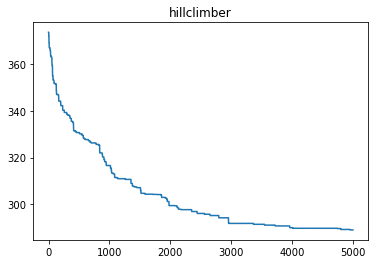

In [17]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

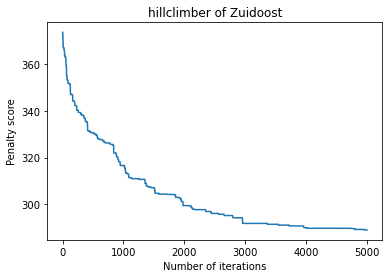

In [18]:
plt = hillclimber_df_N['best'].plot(title='hillclimber of Zuidoost')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_Noord.pdf')


In [19]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 173.63670598739608
Penalties are: 271.81408529362454


### Optimization of Nieuw-West (F)

In [20]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 165.8768689420129
Penalties are: 231.42587110495217
Average distance is : 172.3850297785802
Penalties are: 225.24966411648094
Average distance is : 168.89683106419295
Penalties are: 233.21380558923724
Average distance is : 169.38895119349098
Penalties are: 224.58098714321457
Average distance is : 169.55498350296227
Penalties are: 218.76267030429005
Average distance is : 168.89722453145367
Penalties are: 232.77507635159844
Average distance is : 168.3624191238377
Penalties are: 229.63460610697302
Average distance is : 169.28387127328662
Penalties are: 234.1832947918471
Average distance is : 171.35109884427118
Penalties are: 233.3747381868925
Avera

Average distance is : 164.8090905330161
Penalties are: 214.49515110191513
214.49515110191513 214.72380601482052
72.0
Amount of clusters to change: 37
Average distance is : 164.08509728537936
Penalties are: 214.73738611298242
214.73738611298242 214.49515110191513
64.0
Amount of clusters to change: 41
Average distance is : 164.9227160428503
Penalties are: 212.63991188528533
212.63991188528533 214.49515110191513
58.0
Amount of clusters to change: 30
Average distance is : 164.1134292644398
Penalties are: 213.7637680396497
213.7637680396497 212.63991188528533
74.0
Amount of clusters to change: 37
Average distance is : 165.05925034460546
Penalties are: 211.44723043980366
211.44723043980366 212.63991188528533
48.0
Amount of clusters to change: 31
Average distance is : 164.90701545814272
Penalties are: 211.78677529592915
211.78677529592915 211.44723043980366
71.0
Amount of clusters to change: 37
Average distance is : 165.29211569674254
Penalties are: 212.08649244538543
212.08649244538543 211.4

Average distance is : 168.43920683401913
Penalties are: 199.60593251852563
199.60593251852563 196.49233232605138
58.0
Amount of clusters to change: 40
Average distance is : 165.72483323700692
Penalties are: 197.2669073428929
197.2669073428929 196.49233232605138
43.0
Amount of clusters to change: 30
Average distance is : 167.64971084401967
Penalties are: 201.22524815705896
201.22524815705896 196.49233232605138
66.0
Amount of clusters to change: 38
Average distance is : 165.46580777496453
Penalties are: 198.2340472620537
198.2340472620537 196.49233232605138
70.0
Amount of clusters to change: 49
Average distance is : 168.48235861022326
Penalties are: 198.85531548455393
198.85531548455393 196.49233232605138
58.0
Amount of clusters to change: 33
Average distance is : 166.77704270971566
Penalties are: 196.7491673082475
196.7491673082475 196.49233232605138
44.0
Amount of clusters to change: 25
Average distance is : 167.47214043340585
Penalties are: 196.88643075738617
196.88643075738617 196.49

Average distance is : 164.5308833811045
Penalties are: 190.99460140506207
190.99460140506207 189.06424869598692
55.0
Amount of clusters to change: 33
Average distance is : 165.95079071004102
Penalties are: 194.9700596670195
194.9700596670195 189.06424869598692
31.0
Amount of clusters to change: 19
Average distance is : 164.65165534778413
Penalties are: 188.26560942161487
188.26560942161487 189.06424869598692
56.0
Amount of clusters to change: 33
Average distance is : 165.29286629360544
Penalties are: 190.3138420748725
190.3138420748725 188.26560942161487
54.0
Amount of clusters to change: 34
Average distance is : 165.3289922279369
Penalties are: 190.8349672890001
190.8349672890001 188.26560942161487
41.0
Amount of clusters to change: 28
Average distance is : 164.11730920264353
Penalties are: 190.8885952843807
190.8885952843807 188.26560942161487
52.0
Amount of clusters to change: 36
Average distance is : 164.85221011434263
Penalties are: 187.36646896352616
187.36646896352616 188.265609

Average distance is : 165.06653254540774
Penalties are: 185.25922486767396
185.25922486767396 182.01730002887112
53.0
Amount of clusters to change: 34
Average distance is : 164.05893886977316
Penalties are: 183.94059965354631
183.94059965354631 182.01730002887112
42.0
Amount of clusters to change: 25
Average distance is : 164.621905147097
Penalties are: 185.0734918968338
185.0734918968338 182.01730002887112
53.0
Amount of clusters to change: 26
Average distance is : 163.13557475481008
Penalties are: 183.01455325762677
183.01455325762677 182.01730002887112
60.0
Amount of clusters to change: 31
Average distance is : 165.11890032527901
Penalties are: 186.52781087479548
186.52781087479548 182.01730002887112
62.0
Amount of clusters to change: 47
Average distance is : 165.0221798024077
Penalties are: 186.50672989125204
186.50672989125204 182.01730002887112
79.0
Amount of clusters to change: 42
Average distance is : 164.59749933159384
Penalties are: 183.78996958906743
183.78996958906743 182.0

Average distance is : 165.0898527116119
Penalties are: 181.2313788374555
181.2313788374555 179.292523693581
56.0
Amount of clusters to change: 31
Average distance is : 165.82838274187654
Penalties are: 181.23841038398615
181.23841038398615 179.292523693581
67.0
Amount of clusters to change: 35
Average distance is : 164.43155678103932
Penalties are: 178.66326476758735
178.66326476758735 179.292523693581
60.0
Amount of clusters to change: 34
Average distance is : 164.49225927183886
Penalties are: 178.88040706380525
178.88040706380525 178.66326476758735
49.0
Amount of clusters to change: 27
Average distance is : 164.50169806243073
Penalties are: 181.1591399191608
181.1591399191608 178.66326476758735
72.0
Amount of clusters to change: 43
Average distance is : 163.1168153693512
Penalties are: 182.249677480512
182.249677480512 178.66326476758735
45.0
Amount of clusters to change: 29
Average distance is : 165.58037245567905
Penalties are: 180.33802719661247
180.33802719661247 178.663264767587

Average distance is : 161.1004510830595
Penalties are: 180.01533351939176
180.01533351939176 176.19624038109905
49.0
Amount of clusters to change: 33
Average distance is : 162.81654753630323
Penalties are: 184.19645714560676
184.19645714560676 176.19624038109905
58.0
Amount of clusters to change: 33
Average distance is : 161.17823165800138
Penalties are: 178.25137917428543
178.25137917428543 176.19624038109905
62.0
Amount of clusters to change: 37
Average distance is : 162.249227216689
Penalties are: 176.27452073910115
176.27452073910115 176.19624038109905
58.0
Amount of clusters to change: 34
Average distance is : 162.43726840593712
Penalties are: 179.87566521027813
179.87566521027813 176.19624038109905
53.0
Amount of clusters to change: 33
Average distance is : 162.72564919832564
Penalties are: 176.76134039072272
176.76134039072272 176.19624038109905
47.0
Amount of clusters to change: 29
Average distance is : 162.8719605732725
Penalties are: 177.9257165624098
177.9257165624098 176.19

Average distance is : 161.89356399804802
Penalties are: 176.83524593398133
176.83524593398133 174.25193993840824
49.0
Amount of clusters to change: 27
Average distance is : 161.0292461928202
Penalties are: 171.53899871042245
171.53899871042245 174.25193993840824
54.0
Amount of clusters to change: 39
Average distance is : 160.81556922706793
Penalties are: 172.29436839572708
172.29436839572708 171.53899871042245
37.0
Amount of clusters to change: 20
Average distance is : 160.82510679453432
Penalties are: 174.8171871619671
174.8171871619671 171.53899871042245
49.0
Amount of clusters to change: 31
Average distance is : 161.91195402962185
Penalties are: 174.12105956115872
174.12105956115872 171.53899871042245
58.0
Amount of clusters to change: 38
Average distance is : 161.0861051781595
Penalties are: 172.29785285343087
172.29785285343087 171.53899871042245
64.0
Amount of clusters to change: 32
Average distance is : 160.9127608541663
Penalties are: 175.2917147820229
175.2917147820229 171.538

Average distance is : 161.30368728514588
Penalties are: 174.00307806755845
174.00307806755845 171.04725414300836
49.0
Amount of clusters to change: 29
Average distance is : 162.23898512245364
Penalties are: 176.77032516600903
176.77032516600903 171.04725414300836
45.0
Amount of clusters to change: 25
Average distance is : 161.42376884258906
Penalties are: 175.78973305745356
175.78973305745356 171.04725414300836
51.0
Amount of clusters to change: 37
Average distance is : 160.8488992228772
Penalties are: 178.66463576171685
178.66463576171685 171.04725414300836
67.0
Amount of clusters to change: 36
Average distance is : 160.97225852373208
Penalties are: 178.03596866519104
178.03596866519104 171.04725414300836
52.0
Amount of clusters to change: 28
Average distance is : 160.1481954919397
Penalties are: 174.67408264844576
174.67408264844576 171.04725414300836
32.0
Amount of clusters to change: 25
Average distance is : 161.34353036559202
Penalties are: 172.49949913386584
172.49949913386584 17

Average distance is : 161.08269148399785
Penalties are: 170.5217118467905
170.5217118467905 170.40575363295156
58.0
Amount of clusters to change: 33
Average distance is : 161.57285494486098
Penalties are: 172.06663154653066
172.06663154653066 170.40575363295156
60.0
Amount of clusters to change: 33
Average distance is : 160.8145075344817
Penalties are: 174.1421853045905
174.1421853045905 170.40575363295156
56.0
Amount of clusters to change: 33
Average distance is : 159.76379701859793
Penalties are: 171.60628350495622
171.60628350495622 170.40575363295156
49.0
Amount of clusters to change: 34
Average distance is : 162.5227310530557
Penalties are: 174.10692619574633
174.10692619574633 170.40575363295156
50.0
Amount of clusters to change: 37
Average distance is : 162.32055253459063
Penalties are: 179.68196305456644
179.68196305456644 170.40575363295156
59.0
Amount of clusters to change: 36
Average distance is : 162.45226659624248
Penalties are: 175.28396199595804
175.28396199595804 170.40

Average distance is : 161.09615588882428
Penalties are: 169.20807885670294
169.20807885670294 169.1702918775864
49.0
Amount of clusters to change: 33
Average distance is : 160.50728618058628
Penalties are: 170.22978513136368
170.22978513136368 169.1702918775864
41.0
Amount of clusters to change: 27
Average distance is : 161.2349470907492
Penalties are: 171.32035779039555
171.32035779039555 169.1702918775864
64.0
Amount of clusters to change: 40
Average distance is : 161.24272743993052
Penalties are: 173.34611085554806
173.34611085554806 169.1702918775864
48.0
Amount of clusters to change: 30
Average distance is : 160.18760878171452
Penalties are: 170.7268272543547
170.7268272543547 169.1702918775864
47.0
Amount of clusters to change: 33
Average distance is : 160.08273402306915
Penalties are: 169.93152691752476
169.93152691752476 169.1702918775864
63.0
Amount of clusters to change: 37
Average distance is : 161.47799629713828
Penalties are: 173.1142373592532
173.1142373592532 169.1702918

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of "Centrum"

In [ ]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Calculation of lower and upper bounds

In [ ]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound

### Conclusion
Preliminary results show that 